# INTRODUCTION

garment industry
<!-- In Bangladesh, the garment industry has played an important role in economically uplifting a diverse community of poor and marginalized people. There are now 4,825 garment factories that employ more than three million people. Completely 85% of these employees are female. But most of the female workers work to support their family and also contribute his family to lead a minimum life. In this paper, we try to find out relation between their health status, their family earning, their family member information, their working time or how many year they work in this sector and how many time they want to work. The dataset is collected from the Ashulia and Gazipur area garments of Bangladesh. This research work has observed that most of the female workers work at finishing, swing, helper, and cleaner sector. In this sector they cannot get huge salary that's why their income is limited and the range of their salaries is very low. It has also been found that, some women manage their whole family with their own income. Besides they are feeling bored with the same work. Nowadays machine learning and data mining tools play a vital role in finding the measurement of some important factors. This paper analyses the women working performance based on their previous activity and use some machine learning algorithms likely: Decision Tree Classifier(DTC), Logistic Regression(LR), Random Forest Classifier(RFC), and Stochastic Gradient Descent(SGD) we get the best result from Logistic Regression(LR) and it is 69%. -->

# BUSINESS PROBLEM

GOAL; in plain term. NOTEtoSELF: EDIT THIS
- Predict bad performance of workers. 
    - Focus on predicting bad performance, don't want to miss much of those. 
    - Focus on maximizing true negatives and minimizing false positives while tackling overfitting.
- to achieve a goal how many people should be assigned at every department and does overtime has any relation with achieving target. IS IT POSSIBLE?

# IMPORTS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# custom functions and packages loader
import imports_and_functions as fun
from imports_and_functions.packages import *

# notebook styling packages
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')
## to reset to default theme
# jtplot.reset()

# OBTAIN

The data is obtained from <i>UCI Machine Learning Repository</i>, titled <b>"Productivity Prediction of Garment Employees Data Set"</b> by [Abdullah Al Imran](abdalimran@gmail.com)[1]. Which can be found [here](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#). A copy of the data is in this repository at `/data/garments_worker_productivity.csv`.

<br>
Data with explanation.

 - `date`: Date in MM-DD-YYYY.
 - `day`: Day of the Week.
 - `quarter`: A portion of the month. A month was divided into four quarters.
 - `department`: Associated department with the instance.
 - `team_no`: Associated team number with the instance.
 - `no_of_workers`: Number of workers in each team.
 - `no_of_style_change`: Number of changes in the style of a particular product.
 - `targeted_productivity`: Targeted productivity set by the Authority for each team for each day.
 - `smv`: Standard Minute Value, it is the allocated time for a task.
 - `wip`: Work in progress. Includes the number of unfinished items for products.
 - `over_time`: Represents the amount of overtime by each team in minutes.
 - `incentive`: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
 - `idle_time`: The amount of time when the production was interrupted due to several reasons.
 - `idle_men`: The number of workers who were idle due to production interruption.
 - `actual_productivity`: The actual % of productivity that was delivered by the workers. It ranges from 0-1.


<br>


___
[1]  ```Rahim, M. S., Imran, A. A., & Ahmed, T. (2021). Mining the Productivity Data of Garment Industry. International Journal of Business Intelligence and Data Mining, 1(1), 1. ```



<!--  Rahim, Md Shamsur, Abdullah Al Imran, and Tanvir Ahmed. “Mining the Productivity Data of Garment Industry.” International Journal of Business Intelligence and Data Mining 1, no. 1 (2021): 1. https://doi.org/10.1504/ijbidm.2021.10028084.  -->
 

<br>
<p class="normal">@article{Rahim_2021,
<br>	doi = {10.1504/ijbidm.2021.10028084},
<br>	url = {<a href="https://doi.org/10.1504%2Fijbidm.2021.10028084">[Web Link]</a>},
<br>	year = 2021,
<br>	publisher = {Inderscience Publishers},
<br>	volume = {1},
<br>	number = {1},
<br>	pages = {1},
<br>	author = {Md Shamsur Rahim and Abdullah Al Imran and Tanvir Ahmed},
<br>	title = {Mining the Productivity Data of Garment Industry},
<br>	journal = {International Journal of Business Intelligence and Data Mining}
<br>}
</p>

# SCRUB & EXPLORE

## data

In [3]:
# loading data
df = pd.read_csv('./data/garments_worker_productivity.csv')

In [4]:
df.sample(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
391,1/22/2015,Quarter4,finishing,Thursday,8,0.80,2.90,NaN,4800,0,0.0,0,0,8.0,0.397743
770,2/15/2015,Quarter3,sweing,Sunday,12,0.80,15.26,1120.0,1440,50,0.0,0,0,34.0,0.800806
310,1/18/2015,Quarter3,sweing,Sunday,3,0.65,22.52,1138.0,10170,35,0.0,0,0,56.5,0.650417
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
649,2/7/2015,Quarter1,finishing,Saturday,7,0.70,3.94,NaN,1200,0,0.0,0,0,10.0,0.715767
254,1/14/2015,Quarter2,sweing,Wednesday,10,0.50,22.40,947.0,3390,23,0.0,0,0,56.5,0.499980
727,2/11/2015,Quarter2,finishing,Wednesday,9,0.80,3.94,NaN,960,0,0.0,0,0,8.0,0.541750
422,1/25/2015,Quarter4,sweing,Sunday,4,0.75,22.52,867.0,10260,94,0.0,0,0,57.0,0.900321
28,1/3/2015,Quarter1,sweing,Saturday,11,0.80,11.61,1005.0,7080,50,0.0,0,0,29.5,0.800237


In [5]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [6]:
fun.check_NaN(df)

,name,is_null,not_null
0,date,0,1197
1,quarter,0,1197
2,department,0,1197
3,day,0,1197
4,team,0,1197
5,targeted_productivity,0,1197
6,smv,0,1197
7,wip,506,691
8,over_time,0,1197
9,incentive,0,1197


In [7]:
fun.check_duplicates(df, verbose=True)

date >> number of uniques: 59
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']
____________________________________________________________
quarter >> number of uniques: 5
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
____________________________________________________________
department >> number of uniques: 3
['sweing' 'finishing ' 'fini

,name,duplicated,not_duplicated
0,date,1138,59
1,quarter,1192,5
2,department,1194,3
3,day,1191,6
4,team,1185,12
5,targeted_productivity,1188,9
6,smv,1127,70
7,wip,648,549
8,over_time,1054,143
9,incentive,1149,48


In [8]:
df.describe().transpose().round(2).style.format("{0:,.2f}")

,count,mean,std,min,25%,50%,75%,max
team,"1,197.00",6.43,3.46,1.00,3.00,6.00,9.00,12.00
targeted_productivity,"1,197.00",0.73,0.10,0.07,0.70,0.75,0.80,0.80
smv,"1,197.00",15.06,10.94,2.90,3.94,15.26,24.26,54.56
wip,691.00,"1,190.47","1,837.46",7.00,774.50,"1,039.00","1,252.50","23,122.00"
over_time,"1,197.00","4,567.46","3,348.82",0.00,"1,440.00","3,960.00","6,960.00","25,920.00"
incentive,"1,197.00",38.21,160.18,0.00,0.00,0.00,50.00,"3,600.00"
idle_time,"1,197.00",0.73,12.71,0.00,0.00,0.00,0.00,300.00
idle_men,"1,197.00",0.37,3.27,0.00,0.00,0.00,0.00,45.00
no_of_style_change,"1,197.00",0.15,0.43,0.00,0.00,0.00,0.00,2.00
no_of_workers,"1,197.00",34.61,22.20,2.00,9.00,34.00,57.00,89.00


In [9]:
# fun.distribution_of_features(df,color_plot='silver')

## Feature engineering

### Creating target; `performance`

In [10]:
# # Multiclass target, labaled
# # empty list to hold data
# lst = []
# for x in zip(df.targeted_productivity, df.actual_productivity):
#     # % change in variables
#     delta = np.log(x[1] / x[0])
#     if delta < 0:
#         lst.append('below')
#     elif 0 <= delta < .25:
#         lst.append('met')
#     elif delta >= .25:
#         lst.append('above')
#     # error hadeler
#     else:
#         lst.append('?')
# df['performance'] = lst

In [11]:
# # binary target class, labaled
# lst = []
# for x in zip(df.targeted_productivity, df.actual_productivity):
#     # % change in variables
#     delta = np.log(x[1] / x[0])
#     if delta < 0:
#         lst.append('not_met')
#     else:
#         lst.append('met')
# df['performance'] = lst

In [12]:
# binary target class, int
lst = []
for x in zip(df.targeted_productivity, df.actual_productivity):
    # % change in variables
    delta = np.log(x[1] / x[0])
    if delta < 0:
        lst.append(0)
    else:
        lst.append(1)
df['performance'] = lst

In [13]:
# # Multiclass target, int
# # empty list to hold data
# lst = []
# for x in zip(df.targeted_productivity, df.actual_productivity):
#     # % change in variables
#     delta = np.log(x[1] / x[0])
#     if delta < 0:
#         lst.append(0)
#     elif 0 <= delta < .25:
#         lst.append(1)
#     elif delta >= .25:
#         lst.append(2)
#     # error hadeler
#     else:
#         lst.append('?')
# df['performance'] = lst

In [14]:
df.performance.value_counts(1)

1    0.730994
0    0.269006
Name: performance, dtype: float64

### cleaning `wip`

In [15]:
# filling NaN's with 0, meaning no wip for that session
df['wip'] = df['wip'].fillna(0)

In [16]:
# # filling NaN's with 0, meaning no wip for that session
# df['wip'] = df['wip'].fillna(0)
# # intervals for binning
# bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 150), 
#                                      (150, 500), (500, 2500),
#                                      (2500, 1e6)],
#                                     closed='left')
# # binning
# wip_size = pd.cut(df['wip'].tolist(), bins=bins)
# # naming categories
# wip_size.categories = ['no_wip', 'small', 'med', 'large', 'xl'] 
# # appending to df
# df['wip_size'] = wip_size

### text cleaning in `department` categories 

In [17]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [18]:
# cleaning spaces
df['department'] = df['department'].str.strip()
# checking
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

### cleaning `targeted_productivity`

In [19]:
# correcting possible error in data
df[df.targeted_productivity<.3]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,performance
633,2/5/2015,Quarter1,sweing,Thursday,7,0.07,24.26,1608.0,6960,0,0.0,0,0,58.0,0.522845,1


In [20]:
print(
f"""
mode: {df.targeted_productivity.mode()[0]},
mean: {round(df.targeted_productivity.mean(),2)},
25% quantile: {df.targeted_productivity.quantile(.25)}"""
)


mode: 0.8,
mean: 0.73,
25% quantile: 0.7


In [21]:
df.at[df[df.targeted_productivity < .3].index,
      'targeted_productivity'] = df.targeted_productivity.quantile(.25)

df[df.targeted_productivity < .3]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,performance


### drop features

In [22]:
df.drop(columns=['date', 'actual_productivity'], inplace=True)

In [23]:
# df.drop(columns=['date', 'wip', 'actual_productivity'], inplace=True)

### dtype casting

In [24]:
df.dtypes

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
performance                int64
dtype: object

In [25]:
df['quarter'] = df['quarter'].astype('category')
df['department'] = df['department'].astype('category')
df['day'] = df['day'].astype('category')
# df['team'] = df['team'].astype('category')
# df['performance'] = df['performance'].astype('category')

In [26]:
df.dtypes

quarter                  category
department               category
day                      category
team                        int64
targeted_productivity     float64
smv                       float64
wip                       float64
over_time                   int64
incentive                   int64
idle_time                 float64
idle_men                    int64
no_of_style_change          int64
no_of_workers             float64
performance                 int64
dtype: object

### preparing data for model

In [27]:
print(f"""numeric cols: {df.select_dtypes('number').columns.tolist()}
categorical cols: {df.select_dtypes('category').columns.tolist()}""")

numeric cols: ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'performance']
categorical cols: ['quarter', 'department', 'day']


#### split using `sklearn`

In [28]:
X = df.drop(columns='performance').copy()
y = df['performance'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((897, 13), (897,), (300, 13), (300,))

In [30]:
y_train.value_counts(1)

1    0.730212
0    0.269788
Name: performance, dtype: float64

#### Class imbalance

In [31]:
XX = X.copy()

In [32]:
yy = y.copy()

In [33]:
len(XX.select_dtypes('category').columns)

3

In [34]:
smotenc_features=[True]*4+[False]*9

In [35]:
oversampling = SMOTENC(categorical_features=smotenc_features,n_jobs=-1)
XX_oversampled, yy_oversampled = oversampling.fit_sample(XX,yy)
X_train, y_train = XX_oversampled.copy(), yy_oversampled.copy()
X_train.shape, y_train.shape

((1750, 13), (1750,))

#### OHE using `pandas`

In [36]:
pd.get_dummies(X_train).shape, pd.get_dummies(X_test).shape

((1750, 23), (300, 23))

#### Pipelining

In [37]:
_test_pipe_train, _test_pipe_test = fun.dataset_preprocessing_pipeline(
    X_train, X_test, scaler=fun.RobustScaler(), drop='first')
display(_test_pipe_train.describe().T.round(2),
        _test_pipe_test.describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
team,1750.0,-0.08,0.67,-1.20,-0.60,0.0,0.40,1.00
targeted_productivity,1750.0,-0.19,0.89,-4.00,-0.50,0.0,0.50,0.50
smv,1750.0,0.14,0.59,-0.43,-0.38,0.0,0.62,2.20
wip,1750.0,0.49,1.28,-0.07,-0.07,0.0,0.93,22.83
over_time,1750.0,0.16,0.60,-0.60,-0.38,0.0,0.62,4.02
incentive,1750.0,0.77,3.62,0.00,0.00,0.0,1.00,90.00
idle_time,1750.0,0.69,11.41,0.00,0.00,0.0,0.00,300.00
idle_men,1750.0,0.52,3.57,0.00,0.00,0.0,0.00,45.00
no_of_style_change,1750.0,0.12,0.38,0.00,0.00,0.0,0.00,2.00
no_of_workers,1750.0,0.02,0.46,-0.58,-0.46,0.0,0.54,1.19


,count,mean,std,min,25%,50%,75%,max
team,300.0,-0.12,0.71,-1.20,-0.80,-0.20,0.45,1.00
targeted_productivity,300.0,-0.19,0.96,-4.00,-0.50,0.00,0.50,0.50
smv,300.0,0.15,0.57,-0.43,-0.38,0.01,0.59,1.99
wip,300.0,0.46,0.55,-0.07,-0.07,0.34,0.98,1.78
over_time,300.0,0.16,0.59,-0.60,-0.34,0.00,0.62,2.07
incentive,300.0,1.28,5.23,0.00,0.00,0.00,1.25,72.00
idle_time,300.0,0.04,0.52,0.00,0.00,0.00,0.00,8.00
idle_men,300.0,0.18,2.32,0.00,0.00,0.00,0.00,35.00
no_of_style_change,300.0,0.12,0.36,0.00,0.00,0.00,0.00,2.00
no_of_workers,300.0,0.05,0.45,-0.58,-0.44,0.05,0.54,0.60


## EDA

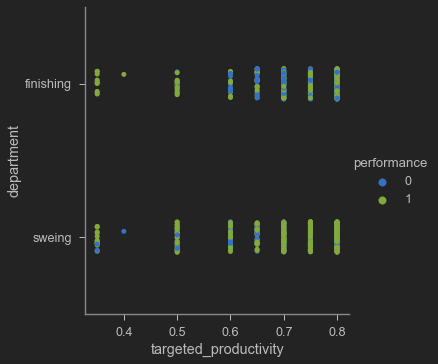

In [38]:
sns.catplot(data=df,
            y='department',
            x='targeted_productivity',
            hue='performance')

<AxesSubplot:xlabel='no_of_workers', ylabel='department'>

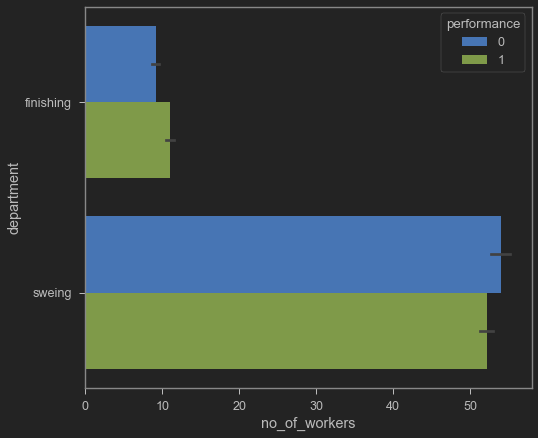

In [39]:
sns.barplot(data=df, y='department', x='no_of_workers', hue='performance')

<AxesSubplot:xlabel='day', ylabel='count'>

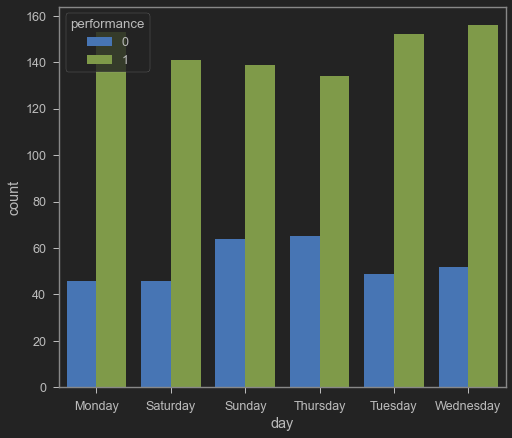

In [40]:
sns.countplot(data=df, hue='performance', x= 'day')

# MODEL

## dummy model

Class balance y_train: 
1    0.5
0    0.5
Name: performance, dtype: float64

Class balance y_test: 
1    0.733333
0    0.266667
Name: performance, dtype: float64

------------------------------


******************************************************************************************
Train accuracy score: 0.5006
Test accuracy score: 0.4867
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report on test data of:
    DummyClassifier(strategy='stratified')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.26      0.54      0.35        80
           1       0.73      0.45      0.56       220

    accuracy                           0.47       300
   macro avg       0.50      0.49      0.45       300
weighted avg       0.60      0.47      0.50       300

************************************************************


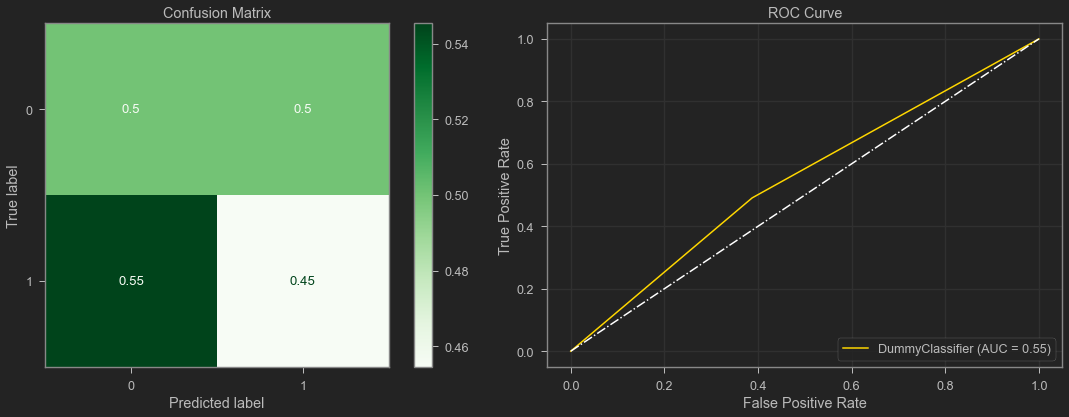

In [41]:
X_train_dummy, X_test_dummy = fun.dataset_preprocessing_pipeline(
    X_train, X_test)

dummy_classifier = DummyClassifier(strategy='stratified')
print(f"""Class balance y_train: 
{y_train.value_counts(1)}
""")
print(f"""Class balance y_test: 
{y_test.value_counts(1)}
""")
print(f"""{'-'*30}""")
fun.model_report(dummy_classifier,
                 X_train=X_train_dummy,
                 y_train=y_train,
                 X_test=X_test_dummy,
                 y_test=y_test)

## logistic regression

### filter with Pearson corr

Text(0, 0.5, 'features')

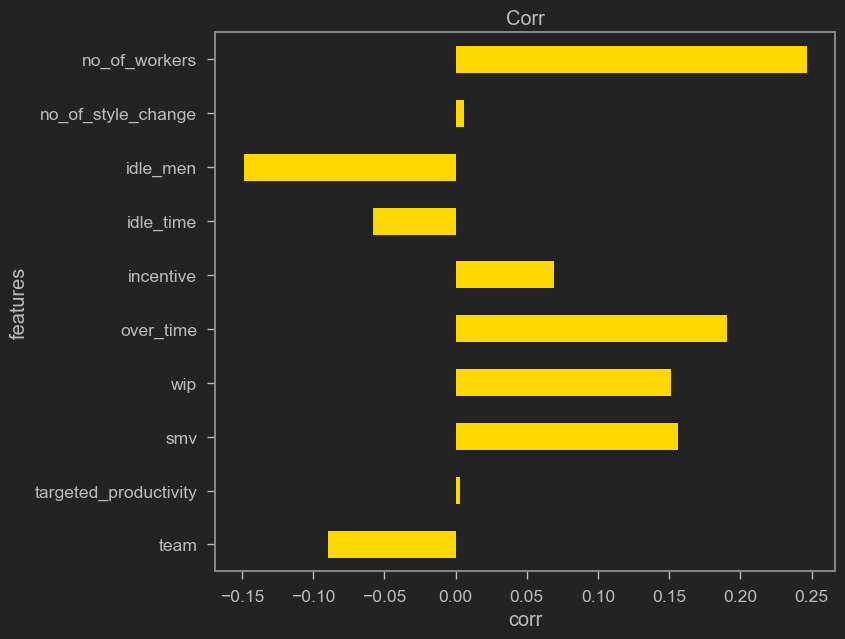

In [191]:
df.corr()['performance'][:-1].plot(kind='barh',color='gold')
plt.title('Corr')
plt.xlabel('corr')
plt.ylabel('features')

Correlation with target

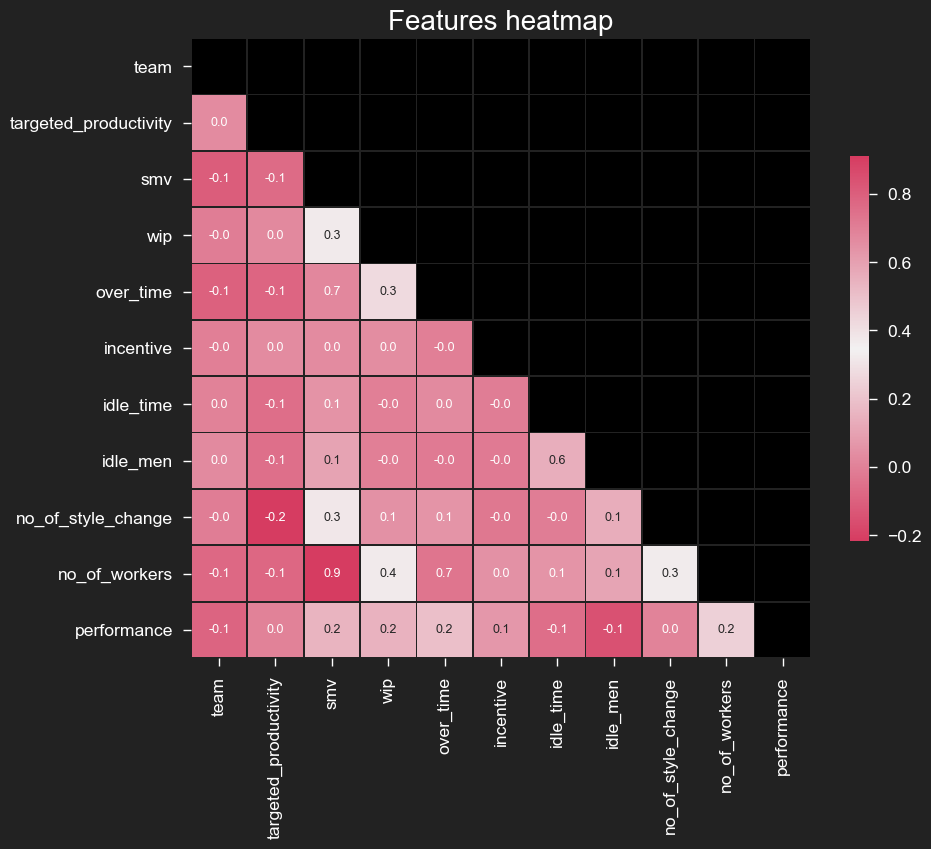

In [192]:
fun.heatmap_of_features(df);

Correlation with each other

In [193]:
display(fun.top_correlated_features(df))
print(f"""Features should be dropped: {
                                    fun.drop_features_based_on_correlation(
                                    df, threshold=0.75)
                                        }""")

,feature_combo,correlation
0,smv and no_of_workers,0.912176


Features should be dropped: {'no_of_workers'}


In [194]:
X_train_dropped_ = X_train.drop('no_of_workers',axis=1)
X_test_dropped_ = X_test.drop('no_of_workers',axis=1)

X_train_log_reg, X_test_log_reg = fun.dataset_preprocessing_pipeline(
    X_train_dropped_, X_test_dropped_, drop='first')

### logistic regression classifier

******************************************************************************************
Train accuracy score: 0.7223
Test accuracy score: 0.71
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    LogisticRegression(C=100000.0, class_weight='balanced', max_iter=1000)
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.73      0.59        86
           1       0.87      0.70      0.78       214

    accuracy                           0.71       300
   macro avg       0.68      0.72      0.68       300
weighted avg       0.76      0.71      0.72       300

************************************************************


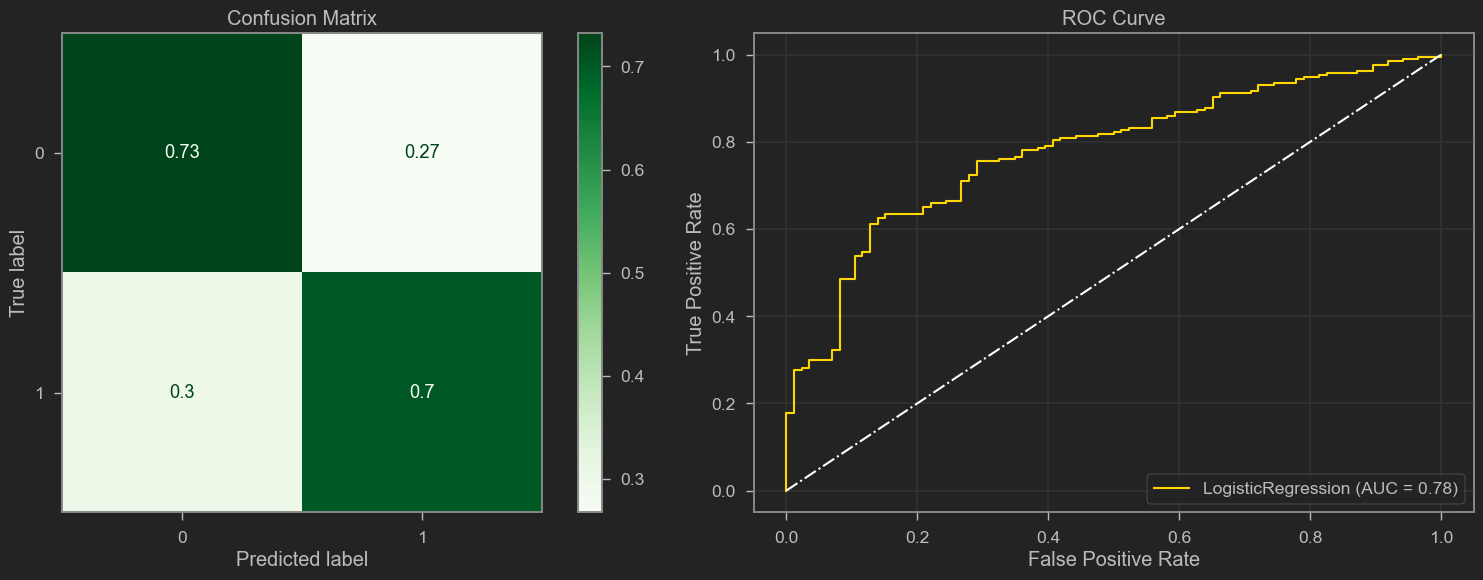

In [195]:
# logistic regression classifier
logreg = LogisticRegression(C=1e5, max_iter=1000, class_weight='balanced')
# score of logistic regression classifier
fun.model_report(logreg,
             X_train=X_train_log_reg,
             y_train=y_train,
             X_test=X_test_log_reg,
             y_test=y_test)

In [196]:
# fit logistic regression classifier to train data
logreg.fit(X_train_log_reg, y_train)
logreg.predict_proba(X_train_log_reg)

array([[0.40905416, 0.59094584],
       [0.59753944, 0.40246056],
       [0.29032915, 0.70967085],
       ...,
       [0.51087224, 0.48912776],
       [0.99834979, 0.00165021],
       [0.12548622, 0.87451378]])

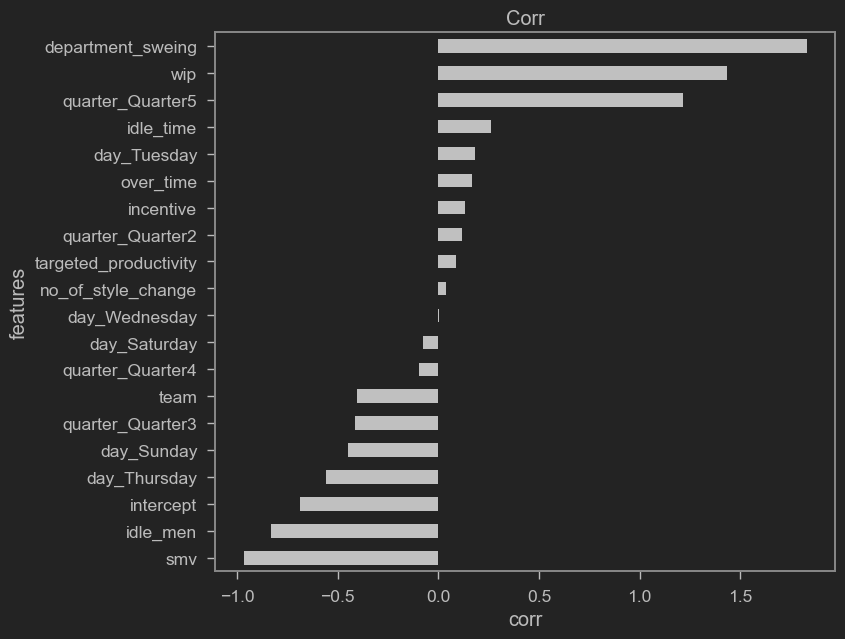

In [197]:
fun.coefficients_of_model_binary(
    logreg, X_train_log_reg, log_scale=True).sort_values().plot(kind='barh',
                                                                color='silver')
plt.title('Corr')
plt.xlabel('corr')
plt.ylabel('features');

### grid search with Cross Validation

In [198]:
logreg_gs = LogisticRegression(max_iter=1e4,
                               class_weight='balanced',
                               n_jobs=-1)
params = {
    'C': [.0001, .001, .01, .1, 10, 100, 1000, 10000, 1e6, 1e12],
    'tol': [0.0001, 0.001, 0.01, .1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
gridsearch_logreg = GridSearchCV(estimator=logreg_gs,
                                 param_grid=params,
                                 n_jobs=-1,
                                 scoring='precision')
gridsearch_logreg

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000.0, n_jobs=-1),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000, 10000,
                               1000000.0, 1000000000000.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='precision')

In [199]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_logreg.fit(X_train_log_reg, y_train)
print(f"Best Parameters by gridsearch:\t{gridsearch_logreg.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_logreg.best_estimator_}")

Best Parameters by gridsearch:	{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 10}
Best Estimator by gridsearch:	LogisticRegression(C=10, class_weight='balanced', max_iter=10000.0, n_jobs=-1,
                   tol=10)


******************************************************************************************
Train accuracy score: 0.7131
Test accuracy score: 0.7
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    LogisticRegression(C=10, class_weight='balanced', max_iter=10000.0, n_jobs=-1,
                   tol=10)
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.72      0.58        86
           1       0.86      0.69      0.77       214

    accuracy                           0.70       300
   macro avg       0.67      0.71      0.67       300
weighted avg       0.75      0.70      0.71       300

************************************************************


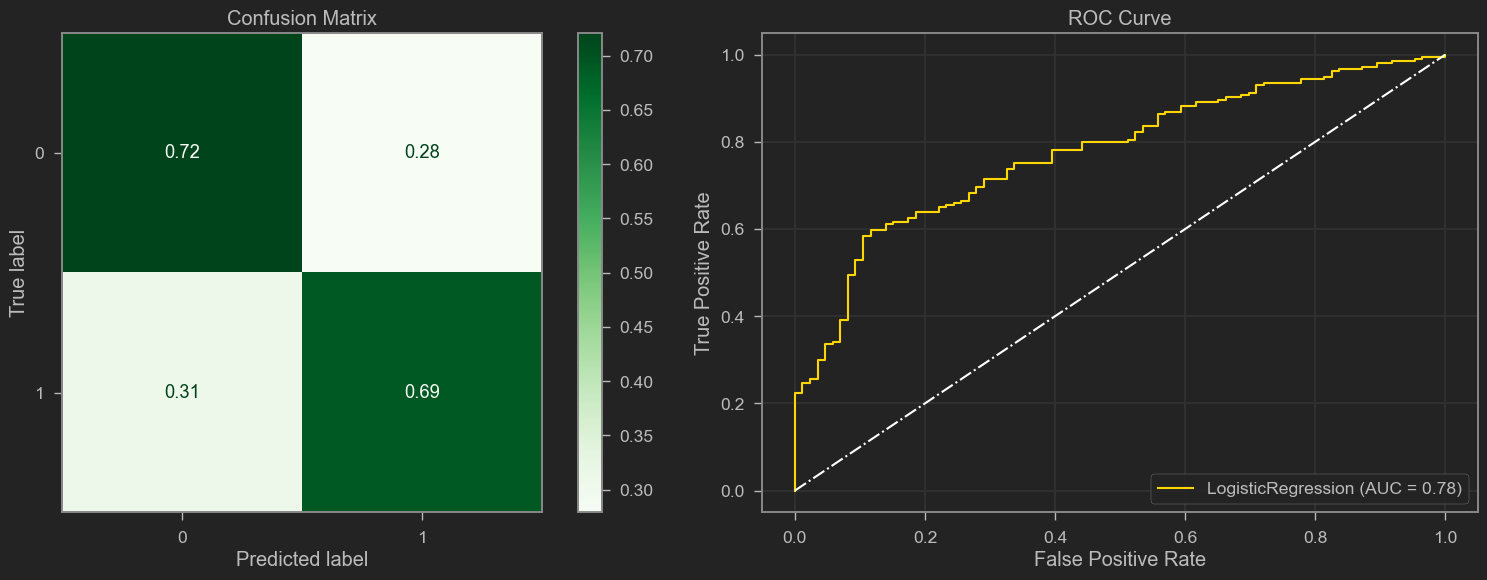

In [200]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    logreg_gs_best = gridsearch_logreg.best_estimator_
    fun.model_report(logreg_gs_best, X_train_log_reg, y_train, X_test_log_reg,
                 y_test)

## KNN Clustering

******************************************************************************************
Train accuracy score: 0.8566
Test accuracy score: 0.81
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    KNeighborsClassifier()
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.85      0.72        85
           1       0.93      0.80      0.86       215

    accuracy                           0.81       300
   macro avg       0.78      0.82      0.79       300
weighted avg       0.84      0.81      0.82       300

************************************************************


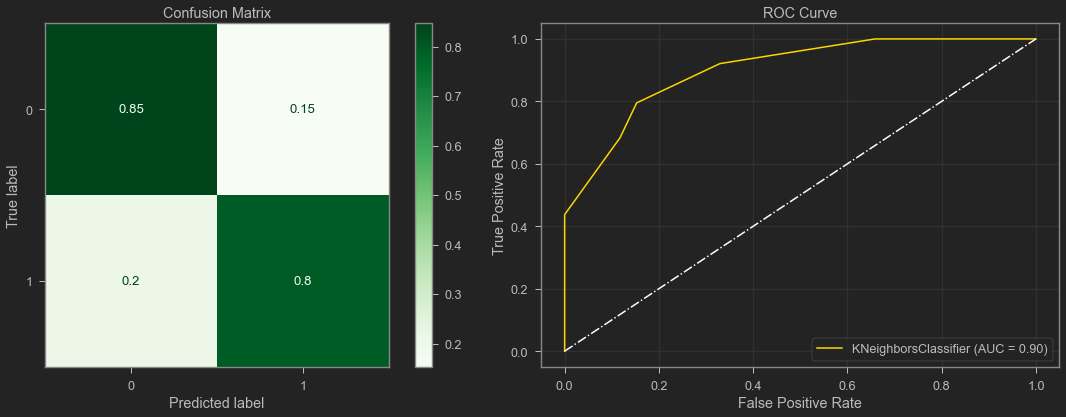

In [63]:
X_train_knn, X_test_knn = fun.dataset_preprocessing_pipeline(X_train, X_test)

knn = KNeighborsClassifier()
fun.model_report(knn, X_train_knn, y_train, X_test_knn, y_test)

### grid search with Cross Validation

In [202]:
knn_gs = KNeighborsClassifier(n_jobs=-1)
params = {
    'n_neighbors': list(range(1, 31, 2)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2, 2.5, 3, 4],
    'leaf_size': [30, 40],
    #     'metric': ['minkowski', 'manhattan', 'euclidean']
}
gridsearch_knn = GridSearchCV(estimator=knn_gs,
                              param_grid=params,
                              n_jobs=-1,
                              scoring='precision')
gridsearch_knn

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'p': [1, 2, 2.5, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

Best Parameters by gridsearch:	{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Estimator by gridsearch:	KNeighborsClassifier(n_jobs=-1, p=1, weights='distance')


******************************************************************************************
Train accuracy score: 0.9989
Test accuracy score: 0.9967
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    KNeighborsClassifier(n_jobs=-1, p=1, weights='distance')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        86
           1       1.00      1.00      1.00       214

    accuracy                           1.00       300
   macro avg       0.99      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

************************************************************


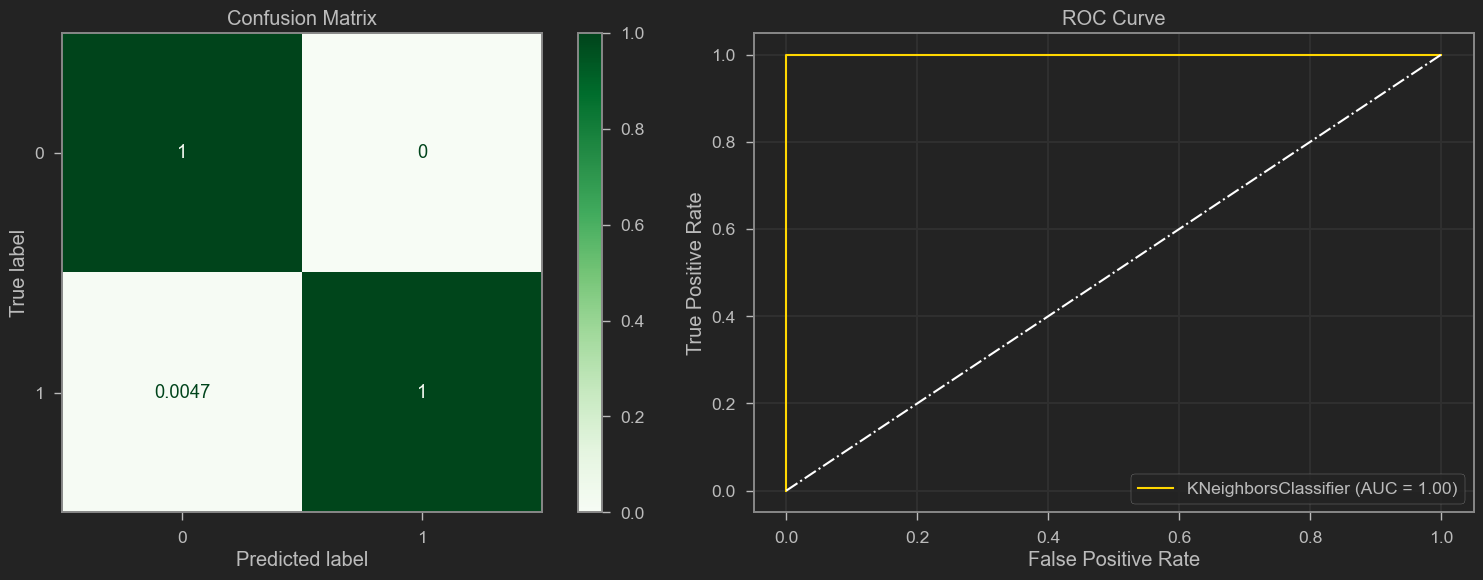

In [203]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_knn.fit(X_train_knn, y_train)
print(f"Best Parameters by gridsearch:\t{gridsearch_knn.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_knn.best_estimator_}")

knn_gs_best = gridsearch_knn.best_estimator_
fun.model_report(knn_gs_best, X_train_knn, y_train, X_test_knn,
             y_test)

## ensemble methods

In [42]:
X_train_ensbl, X_test_ensbl = fun.dataset_preprocessing_pipeline(X_train, X_test)

### Random forest

In [43]:
rf_clf = RandomForestClassifier()

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 1.0
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report on test data of:
    RandomForestClassifier()
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00       220

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

************************************************************


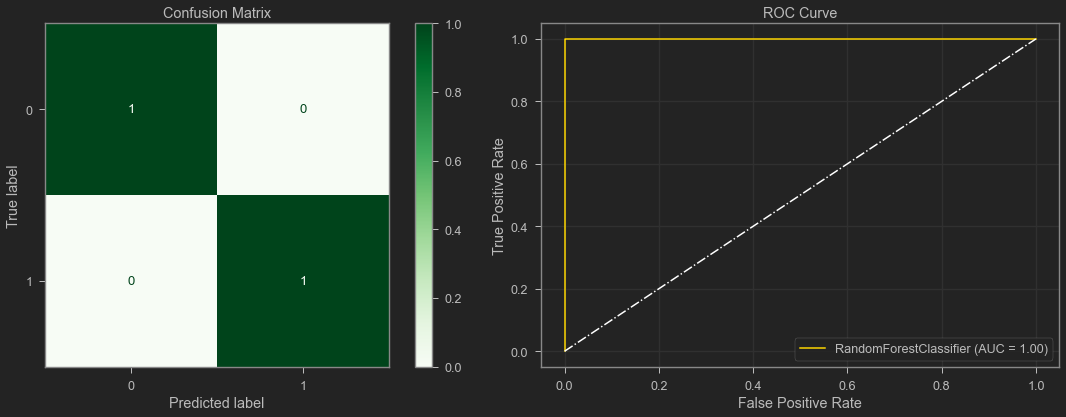

In [88]:
fun.model_report(rf_clf, X_train_ensbl, y_train, X_test_ensbl,
             y_test)

#### grid search with Cross Validation

In [207]:
rf_clf_gs = RandomForestClassifier(n_jobs=-1)
params = {
    'criterion' : ["gini", "entropy"],
    'max_depth' : [2,3,4],
    'min_samples_leaf' : [1,2,3,4],
    'class_weight':["balanced", "balanced_subsample"]
}
gridsearch_rf_clf = GridSearchCV(estimator=rf_clf_gs,
                              param_grid=params,
                              n_jobs=-1,
                              scoring='f1')#'roc_auc_ovr_weighted'
gridsearch_rf_clf

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4]},
             scoring='f1')

Best Parameters by gridsearch:	{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}
Best Estimator by gridsearch:	RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=2, n_jobs=-1)


******************************************************************************************
Train accuracy score: 0.808
Test accuracy score: 0.76
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=2, n_jobs=-1)
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.80      0.66        86
           1       0.90      0.74      0.82       214

    accuracy                           0.76       300
   macro avg       0.73      0.77      0.74       300
weighted avg       0.80      0.76      0.77       300

************************************************************

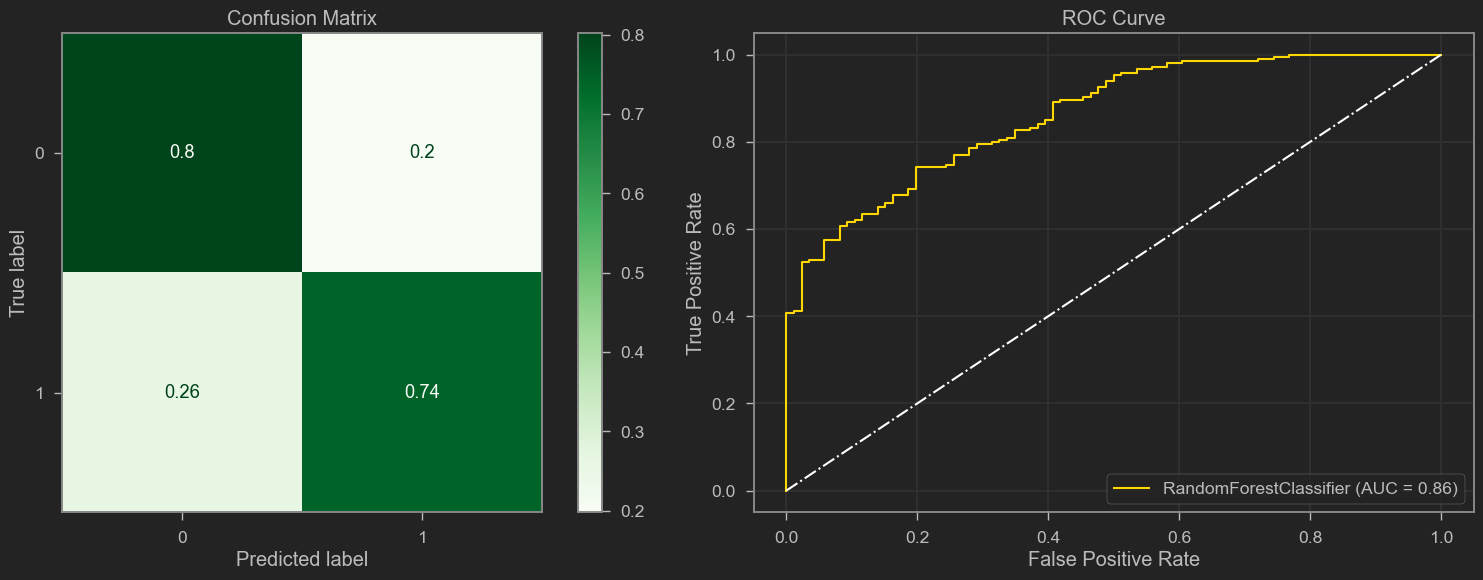

In [208]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_rf_clf.fit(X_train_ensbl, y_train)
print(f"Best Parameters by gridsearch:\t{gridsearch_rf_clf.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_rf_clf.best_estimator_}")

rf_clf_gs_best = gridsearch_rf_clf.best_estimator_
fun.model_report(rf_clf_gs_best, X_train_ensbl, y_train, X_test_ensbl,
             y_test)

### XGBClassifier

******************************************************************************************
Train accuracy score: 0.9914
Test accuracy score: 0.9933
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None

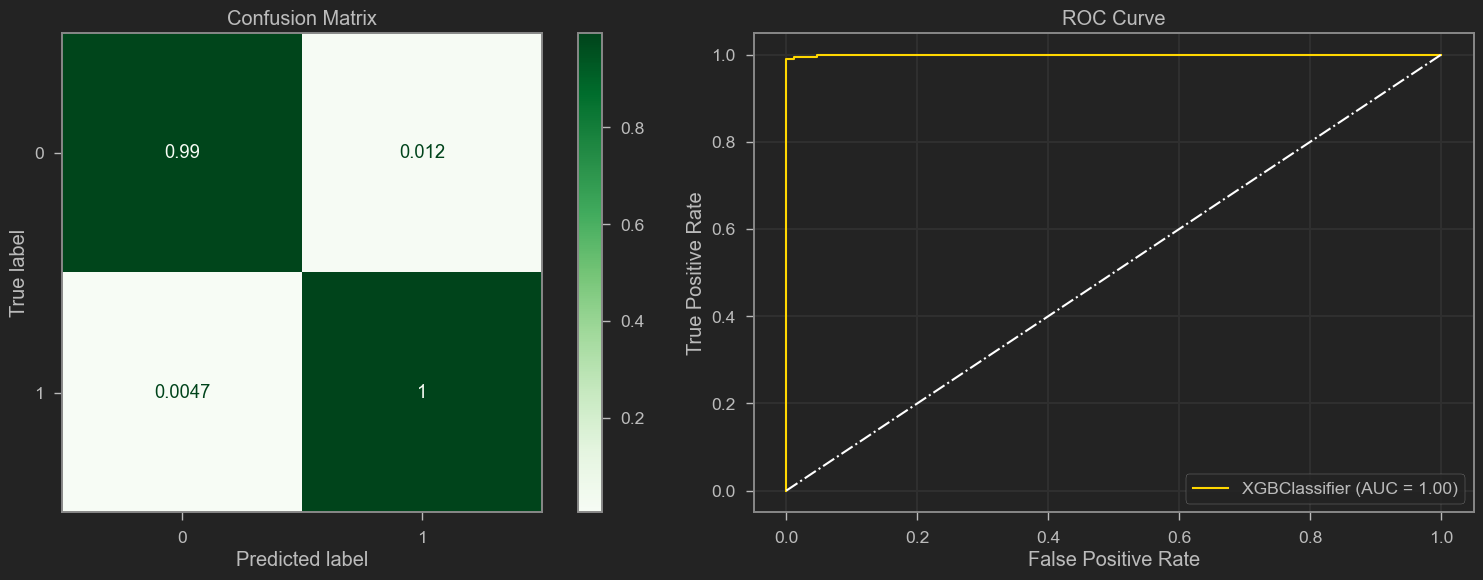

In [209]:
xgg_clf = XGBClassifier(n_jobs=-1)
fun.model_report(xgg_clf, X_train_ensbl, y_train, X_test_ensbl,
             y_test)

#### grid search with Cross Validation

In [210]:
xgg_clf_gs = XGBClassifier(n_jobs=-1,verbosity=0,objective='binary:logistic',eval_metric='error')#“rank:pairwise”,“count:poisson” #'logloss','auc'
params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight': ["balanced", "balanced_subsample"],
    'ccp_alpha': [0.0, 0.05, 0.1, 0.2, 0.3],
    'importance_type':["gain", "weight", "cover", "total_gain","total_cover"],
}
gridsearch_xgg_clf_gs = GridSearchCV(estimator=xgg_clf_gs,
                                 param_grid=params,
                                 n_jobs=-1,
                                 scoring='precision')  #'roc_auc_ovr_weighted'
gridsearch_xgg_clf_gs

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='error',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estima...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=0),
             n_jobs=-1,
             param_grid={'cc

******************************************************************************************
Train accuracy score: 0.9663
Test accuracy score: 0.94
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    XGBClassifier(base_score=0.5, booster='gbtree', ccp_alpha=0.0,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, criterion='gini', eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1,
              min_samples_leaf=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alp

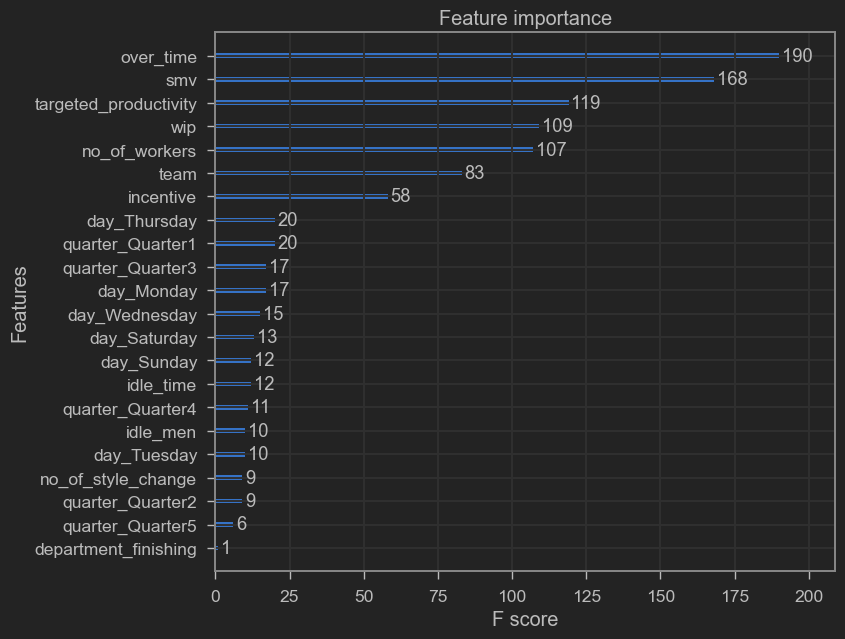

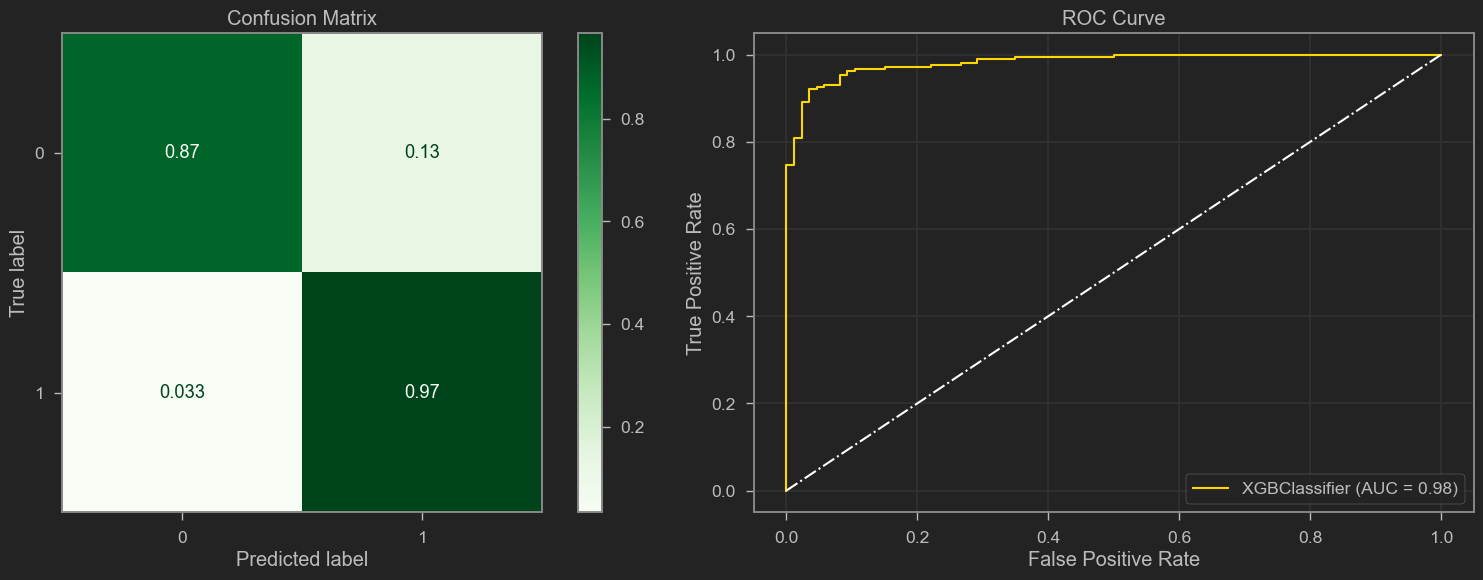

In [211]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_xgg_clf_gs.fit(X_train_ensbl, y_train)
#     print(f"Best Parameters by gridsearch:\t{gridsearch_xgg_clf_gs.best_params_}")
#     print(f"Best Estimator by gridsearch:\t{gridsearch_xgg_clf_gs.best_estimator_}")
    
    
    xgg_clf_gs_best = gridsearch_xgg_clf_gs.best_estimator_
    xgb.plot_importance(xgg_clf_gs_best)
    fun.model_report(xgg_clf_gs_best, X_train_ensbl, y_train, X_test_ensbl,
                 y_test)

### XGBRFClassifier

******************************************************************************************
Train accuracy score: 0.8731
Test accuracy score: 0.84
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)
----------------------------

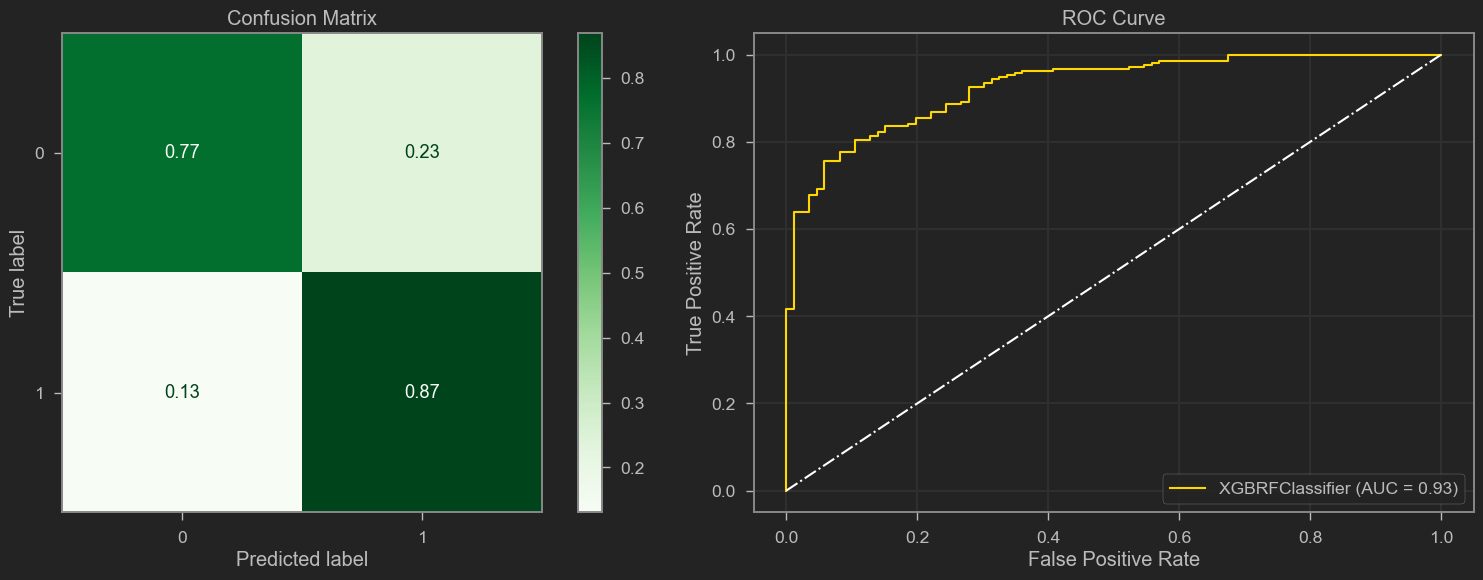

In [212]:
xgg_rf_clf = XGBRFClassifier()
fun.model_report(xgg_rf_clf, X_train_ensbl, y_train, X_test_ensbl,
             y_test)

#### grid search with Cross Validation

In [213]:
xgg_rf_clf_gs = XGBRFClassifier(
    n_jobs=-1,
    verbosity=0,
    objective='binary:logistic',
)  #“rank:pairwise”,“count:poisson” #'logloss','auc','error'
# params = {
#     'criterion': ["gini", "entropy"],
#     'max_depth': [2, 3, 4],
#     'min_samples_leaf': [1, 2, 3, 4],
#     'class_weight': ["balanced", "balanced_subsample"],
#     'ccp_alpha': [0.0, 0.01]
# }
params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight': ["balanced", "balanced_subsample"],
    'ccp_alpha': [0.0, 0.05, 0.1, 0.2, 0.3],
    'importance_type':
    ["gain", "weight", "cover", "total_gain", "total_cover"],
    'eval_metric': ['logloss', 'auc', 'error']
}
gridsearch_xgg_rf_clf = GridSearchCV(
    estimator=xgg_rf_clf_gs,
    param_grid=params,
    n_jobs=-1,
    scoring='roc_auc')  #'roc_auc_ovr_weighted'
gridsearch_xgg_rf_clf

GridSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bytree=None, gamma=None,
                                       gpu_id=None, importance_type='gain',
                                       interaction_constraints=None,
                                       max_delta_step=None, max_depth=None,
                                       min_child_weight=None, missing=nan,
                                       monotone_constraints=None,
                                       n_estimators=100, n_jobs=-1,
                                       num_parallel_tree=None,
                                       objective='binary...
                                       validate_parameters=None, verbosity=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.05, 0.1, 0.2, 0.3],
                         'class_weight': ['balanced', 'balanced_subsamp

******************************************************************************************
Train accuracy score: 0.8206
Test accuracy score: 0.8133
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    XGBRFClassifier(base_score=0.5, booster='gbtree', ccp_alpha=0.0,
                class_weight='balanced', colsample_bylevel=1,
                colsample_bytree=1, criterion='gini', eval_metric='logloss',
                gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=4,
                min_child_weight=1, min_samples_leaf=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=-1,
                num_parallel_tree=100, objective='binary:logistic',
                random_state=0, r

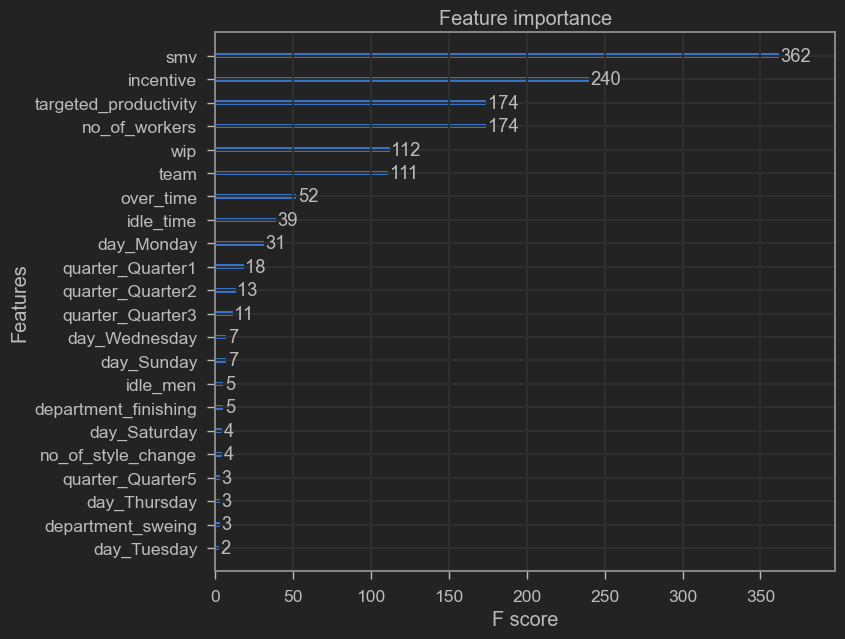

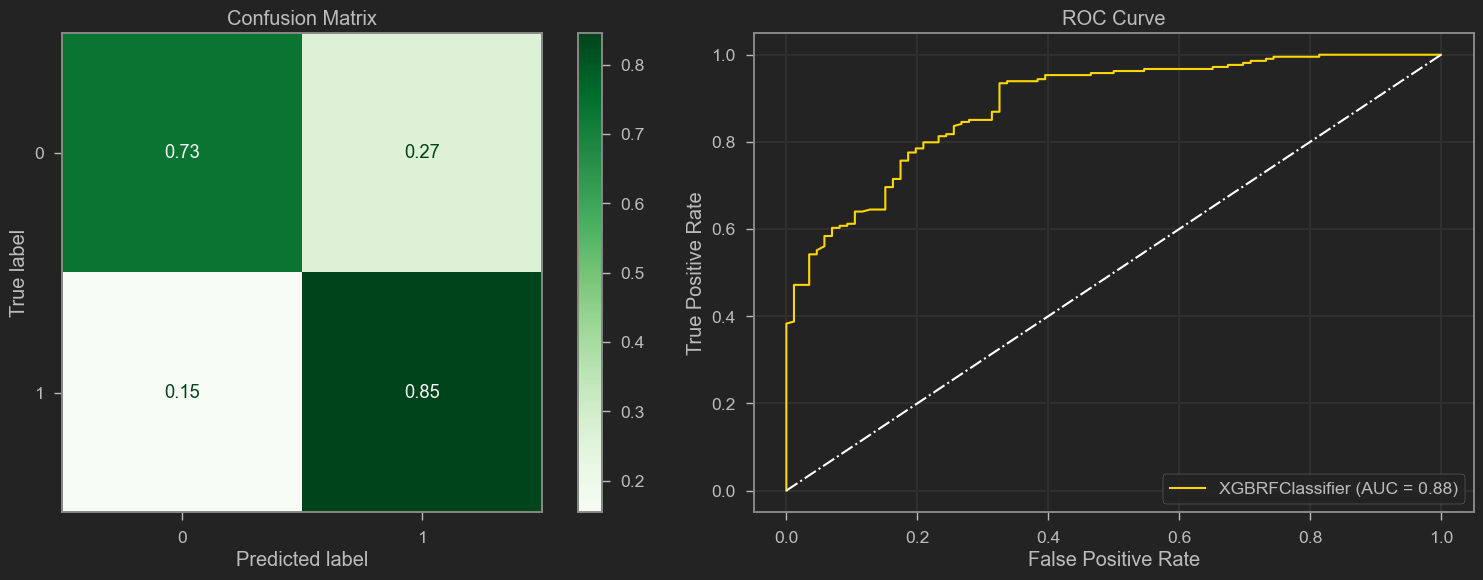

In [214]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_xgg_rf_clf.fit(X_train_ensbl, y_train)
#     print(f"Best Parameters by gridsearch:\t{gridsearch_xgg_rf_clf.best_params_}")
#     print(f"Best Estimator by gridsearch:\t{gridsearch_xgg_rf_clf.best_estimator_}")

    xgg_rf_clf_gs_best = gridsearch_xgg_rf_clf.best_estimator_
    xgb.plot_importance(xgg_rf_clf_gs_best)
    fun.model_report(xgg_rf_clf_gs_best, X_train_ensbl, y_train, X_test_ensbl,
                 y_test)

### catboost

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

------------------------------------------------------------------------------------------
Train score: 0.8011
Test score: 0.76

              precision    recall  f1-score   support

           0       0.56      0.80      0.66        86
           1       0.90      0.74      0.82       214

    accuracy                           0.76       300
   macro avg       0.73      0.77      0.74       300
weighted avg       0.80      0.76      0.77       300



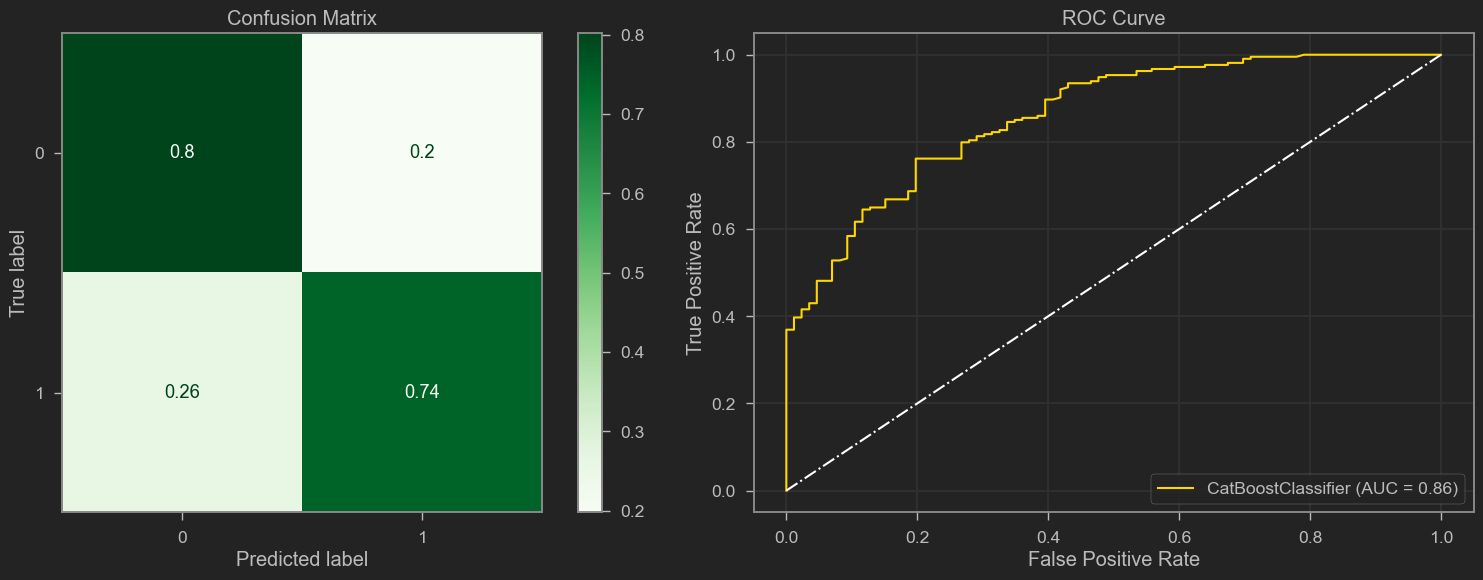

In [215]:
model = CatBoostClassifier(task_type='GPU',
                           auto_class_weights='SqrtBalanced',
                           eval_metric='Precision',
                           devices=[0, 1],
                           min_data_in_leaf=3,
                           iterations=1500)

# 'Logloss', 'CrossEntropy', 'CtrFactor', 'RMSE', 'Lq', 'MAE', 'Quantile',
# 'Expectile', 'LogLinQuantile', 'MAPE', 'Poisson', 'MSLE',
# 'MedianAbsoluteError', 'SMAPE', 'Huber', 'Tweedie', 'RMSEWithUncertainty',
# 'MultiClass', 'MultiClassOneVsAll', 'PairLogit', 'PairLogitPairwise',
# 'YetiRank', 'YetiRankPairwise', 'QueryRMSE', 'QuerySoftMax',
# 'QueryCrossEntropy', 'StochasticFilter', 'StochasticRank',
# 'PythonUserDefinedPerObject', 'PythonUserDefinedMultiRegression',
# 'UserPerObjMetric', 'UserQuerywiseMetric', 'R2', 'NumErrors', 'FairLoss',
# 'AUC', 'Accuracy', 'BalancedAccuracy', 'BalancedErrorRate', 'BrierScore',
# 'Precision', 'Recall', 'F1', 'TotalF1', 'MCC', 'ZeroOneLoss',
# 'HammingLoss', 'HingeLoss', 'Kappa', 'WKappa', 'LogLikelihoodOfPrediction',
# 'NormalizedGini', 'PRAUC', 'PairAccuracy', 'AverageGain', 'QueryAverage',
# 'QueryAUC', 'PFound', 'PrecisionAt', 'RecallAt', 'MAP', 'NDCG', 'DCG',
# 'FilteredDCG', 'MultiRMSE', 'Combination'

cat_features = list(X_train.select_dtypes('category').columns)

model.fit(X_train,
          y_train,
          cat_features=cat_features,
          eval_set=(X_test, y_test),
          plot=True,
          silent=True,
          use_best_model=True)
print(f'{"-"*90}')
train = model.score(X_train, y_train)
test = model.score(X_test, y_test)
print(f"""Train score: {train.round(4)}""")
print(f"""Test score: {test.round(4)}""")
print(f"")
print(metrics.classification_report(y_test, model.predict(X_test)))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
metrics.plot_confusion_matrix(model,
                              X_test,
                              y_test,
                              cmap='Greens',
                              normalize='true',
                              ax=ax[0])
ax[0].title.set_text('Confusion Matrix')
metrics.plot_roc_curve(model, X_test, y_test, color='gold', ax=ax[1])
ax[1].plot([0, 1], [0, 1], ls='-.', color='white')
ax[1].grid()
ax[1].title.set_text('ROC Curve')

plt.tight_layout()
plt.show()

#### grid search with Cross Validation

___
WORK IN PROGRESS

In [64]:
# from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score,precision_recall_curve, f1_score

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     clf = CatBoostClassifier(task_type='GPU', iterations=2)
#     params = {
#         'eval_metric': ['Precision', 'Accuracy', 'Recall', 'AUC', 'F1'],
#         'depth': [4, 5, 6],
#         'loss_function': ['Logloss', 'CrossEntropy'],
#         'l2_leaf_reg': [1, 3, 5, 7, 9],
#         'auto_class_weights': ['SqrtBalanced', 'Balanced', None],
#         'leaf_estimation_method': ['Newton', 'Gradient'],
#         'logging_level': ['Silent']
#     }
#     scorer = make_scorer(f1_score)
#     clf_grid = GridSearchCV(estimator=clf,
#                             param_grid=params,
#                             scoring=scorer,
#                             cv=5)
#     clf_grid.fit(X_train_ensbl, y_train)
#     print(clf_grid.best_params_)
#     clf_grid_best = clf_grid.best_estimator_
#     fun.model_report(clf_grid_best, X_train_ensbl, y_train, X_test_ensbl,
#                      y_test)

In [ ]:
# create pool, then pass to grid search

# model.grid_search()

___

## Support Vector Machines

In [216]:
X_train_svm, X_test_svm  = fun.dataset_preprocessing_pipeline(X_train, X_test)

### lin

******************************************************************************************
Train accuracy score: 0.7114
Test accuracy score: 0.7067
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    SVC(C=100, class_weight='balanced', kernel='linear')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.77      0.60        86
           1       0.88      0.68      0.77       214

    accuracy                           0.71       300
   macro avg       0.69      0.72      0.68       300
weighted avg       0.77      0.71      0.72       300

************************************************************


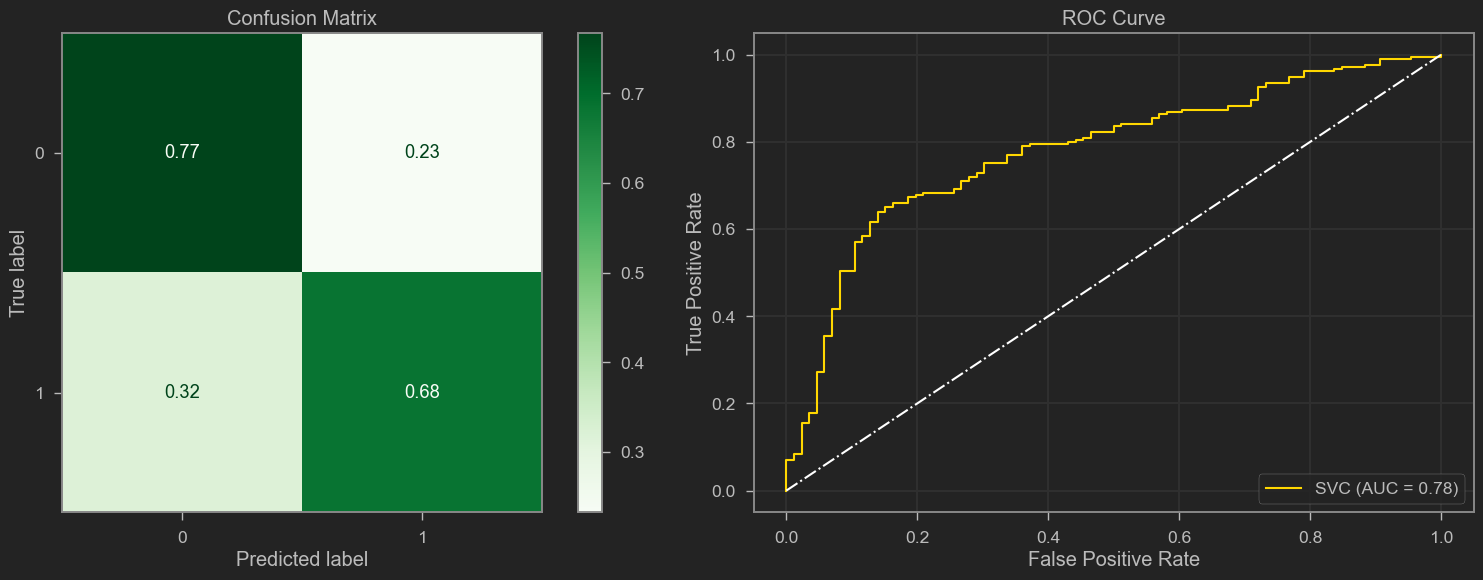

In [217]:
svc_linear = SVC(kernel='linear', C=100,class_weight='balanced')
fun.model_report(svc_linear, X_train_svm, y_train, X_test_svm,
             y_test)

### rbf

******************************************************************************************
Train accuracy score: 0.7897
Test accuracy score: 0.7567
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    SVC(C=1, class_weight='balanced', gamma='auto', tol=0.8)
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.84      0.66        86
           1       0.92      0.72      0.81       214

    accuracy                           0.76       300
   macro avg       0.73      0.78      0.74       300
weighted avg       0.81      0.76      0.77       300

************************************************************


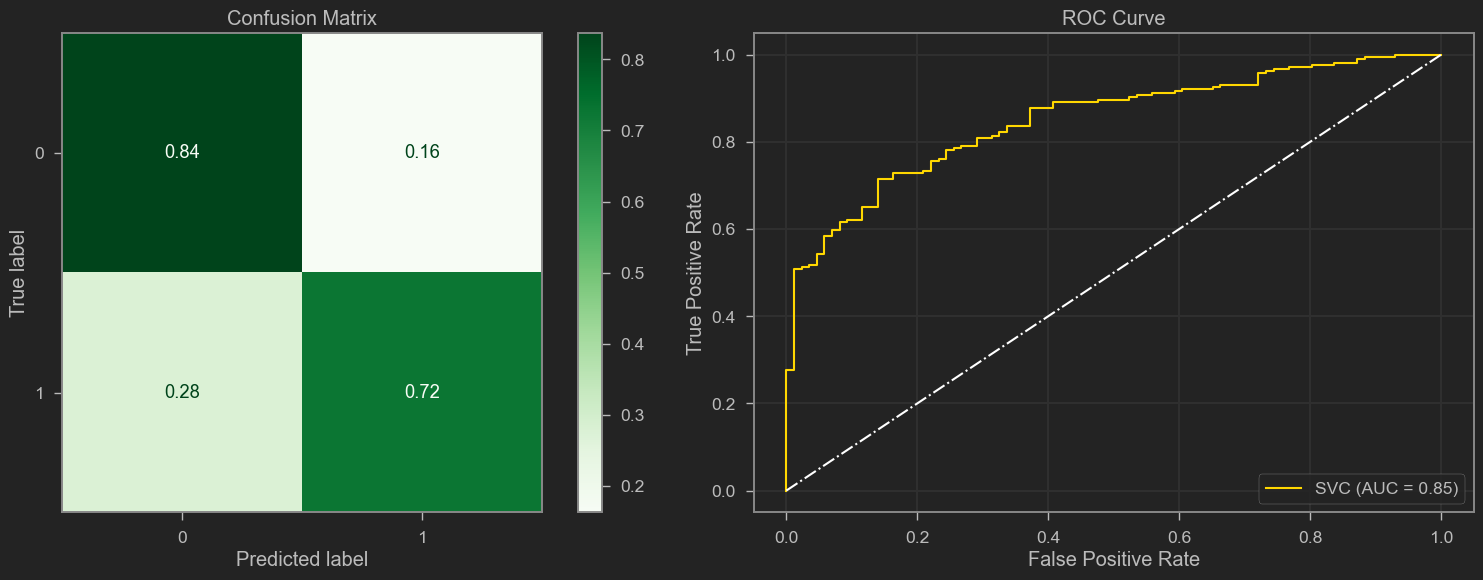

In [218]:
svc_rbf = SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced', tol=.8)
fun.model_report(svc_rbf, X_train_svm, y_train, X_test_svm,
             y_test)

### poly 

******************************************************************************************
Train accuracy score: 0.6829
Test accuracy score: 0.55
    Possible Overfitting, diffrence of scores 13.29% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    SVC(C=1, class_weight='balanced', degree=8, kernel='poly')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.39      0.99      0.56        86
           1       0.99      0.37      0.54       214

    accuracy                           0.55       300
   macro avg       0.69      0.68      0.55       300
weighted avg       0.82      0.55      0.55       300

************************************************************


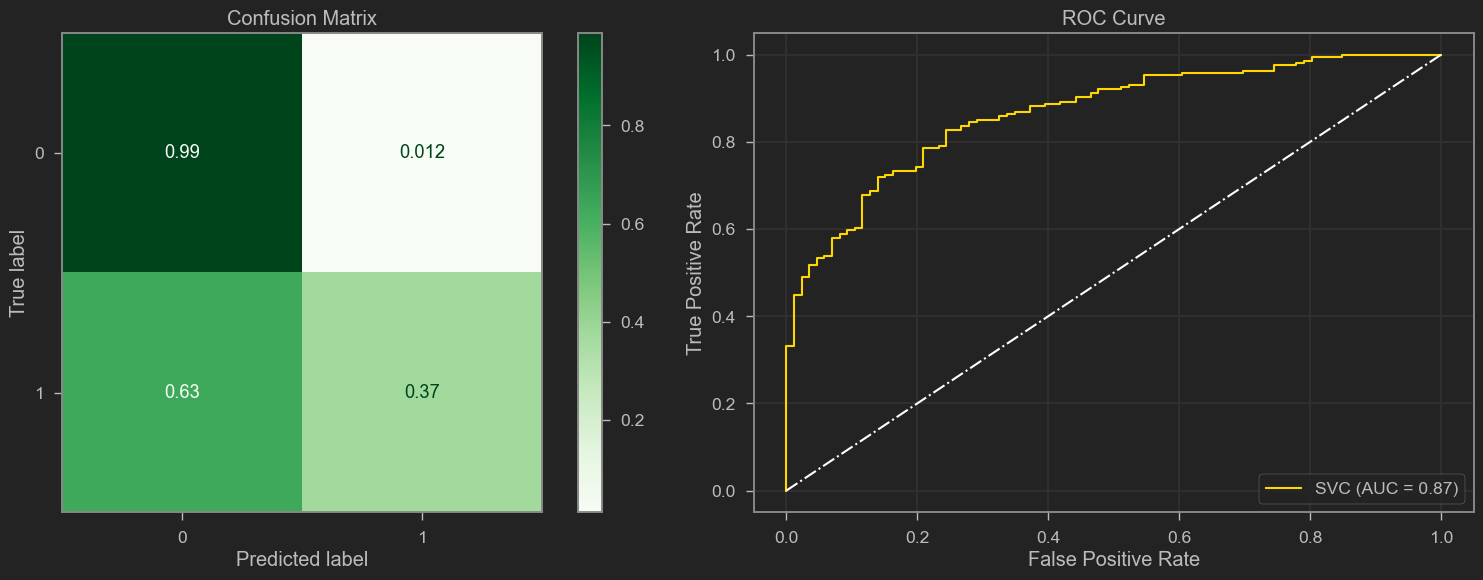

In [219]:
svc_poly = SVC(kernel='poly',
               degree=8,
               C=1,
               gamma='scale',
               class_weight='balanced')
fun.model_report(svc_poly, X_train_svm, y_train, X_test_svm,
             y_test)

### sigmoid

******************************************************************************************
Train accuracy score: 0.6194
Test accuracy score: 0.6067
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    SVC(C=2, class_weight='balanced', kernel='sigmoid')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.39      0.66      0.49        86
           1       0.81      0.58      0.68       214

    accuracy                           0.61       300
   macro avg       0.60      0.62      0.59       300
weighted avg       0.69      0.61      0.63       300

************************************************************


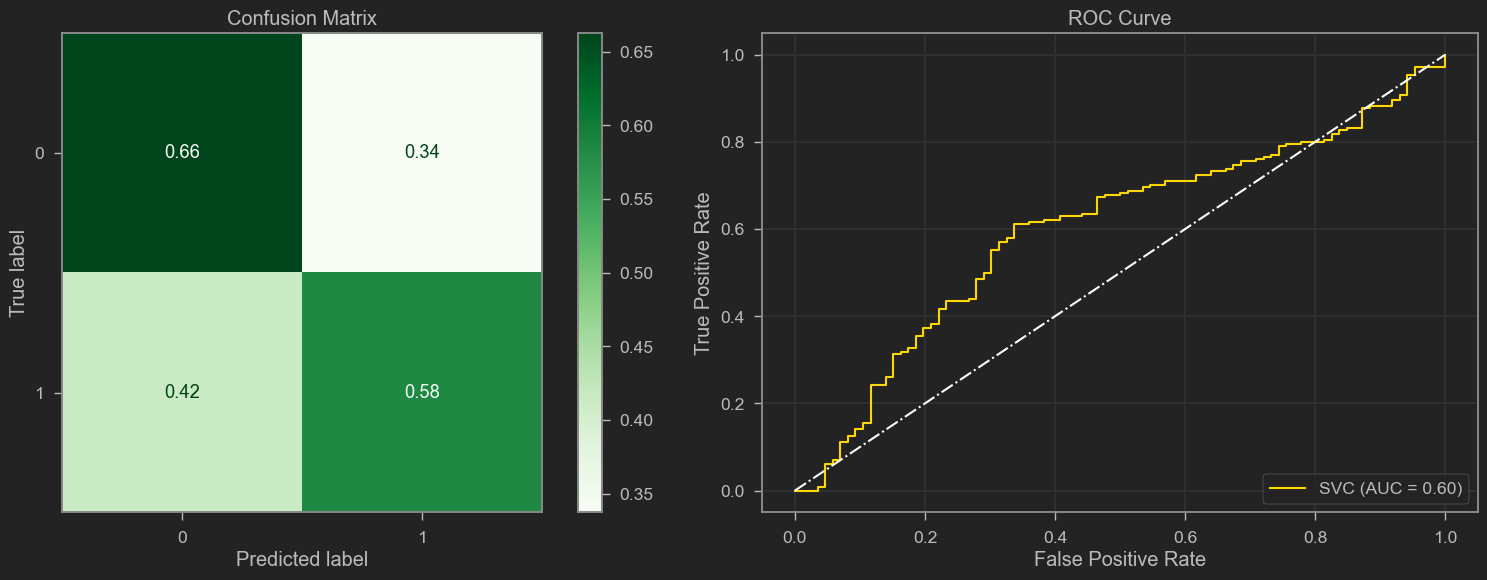

In [220]:
svc_sig = SVC(kernel='sigmoid', C=2, class_weight='balanced')
fun.model_report(svc_sig, X_train_svm, y_train, X_test_svm,
             y_test)

### grid search with Cross Validation

In [221]:
svc_linear_gs = SVC(class_weight="balanced")
params = {
    'C': [1, 10, 1e2, 1e3],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'tol': [0.001, .5, 1, 5],
}
gridsearch_svc_linear = GridSearchCV(
    estimator=svc_linear_gs,
    param_grid=params,
    n_jobs=-1,
    scoring='roc_auc')  #'roc_auc_ovr_weighted'
gridsearch_svc_linear

GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [1, 10, 100.0, 1000.0],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf'],
                         'tol': [0.001, 0.5, 1, 5]},
             scoring='roc_auc')

Best Parameters by gridsearch:	{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 1}
Best Estimator by gridsearch:	SVC(C=10, class_weight='balanced', tol=1)


******************************************************************************************
Train accuracy score: 0.8754
Test accuracy score: 0.84
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    SVC(C=10, class_weight='balanced', tol=1)
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.86      0.76        86
           1       0.94      0.83      0.88       214

    accuracy                           0.84       300
   macro avg       0.80      0.85      0.82       300
weighted avg       0.86      0.84      0.85       300

************************************************************


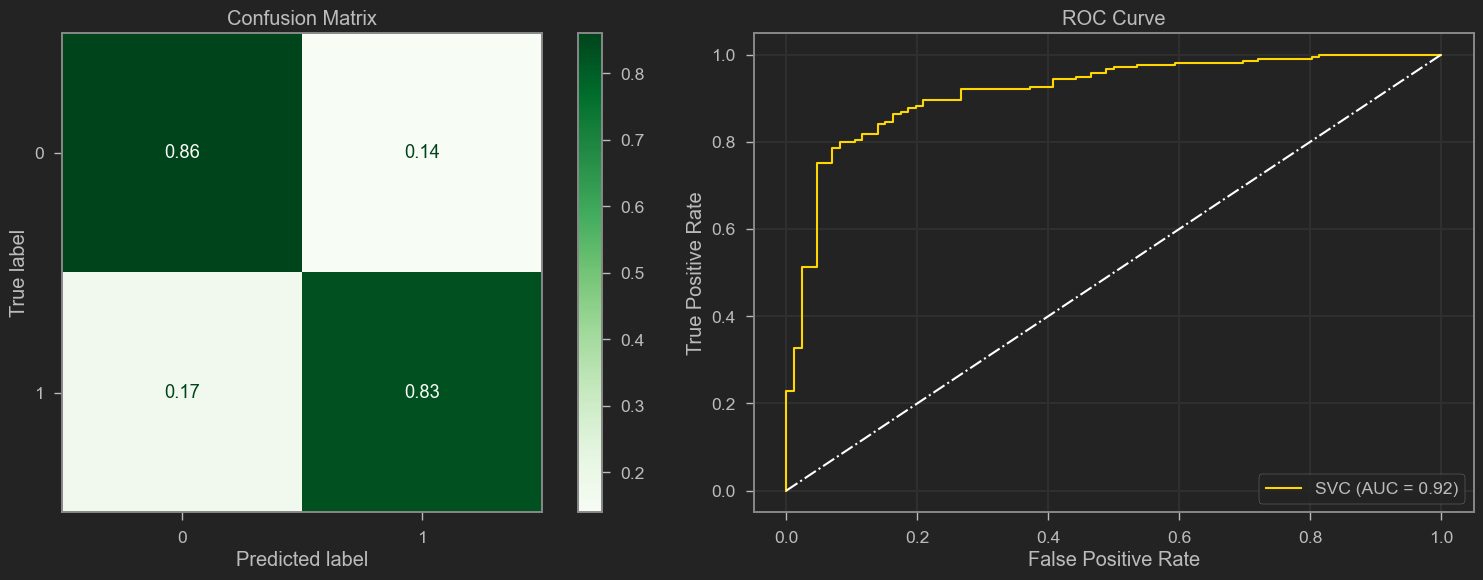

In [222]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_svc_linear.fit(X_train_svm, y_train)
print(f"Best Parameters by gridsearch:\t{gridsearch_svc_linear.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_svc_linear.best_estimator_}")

svc_linear_gs_best = gridsearch_svc_linear.best_estimator_
fun.model_report(svc_linear_gs_best, X_train_svm, y_train, X_test_svm,
             y_test)

## Selecting Best model

### Random Forrest

In [152]:
rf_clf

RandomForestClassifier()

******************************************************************************************
Train accuracy score: 0.9989
Test accuracy score: 1.0
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    RandomForestClassifier()
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       223

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

************************************************************


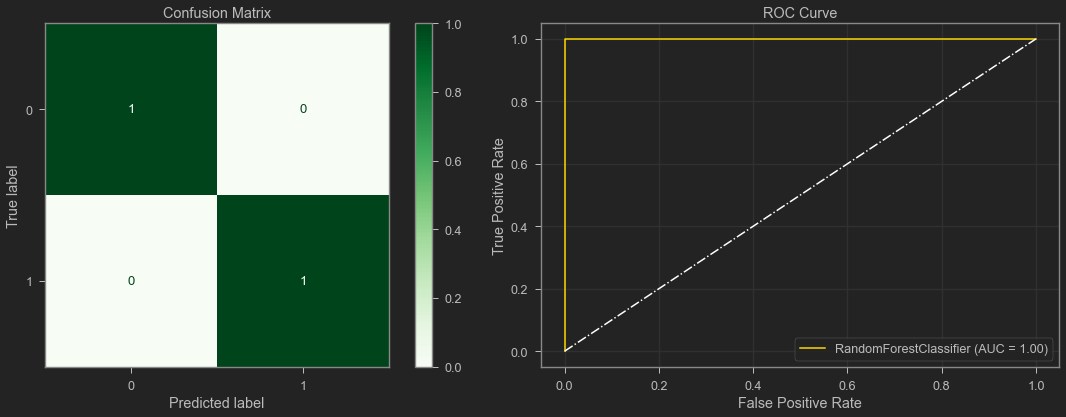

In [143]:
fun.model_report(rf_clf, X_train_ensbl, y_train, X_test_ensbl,
             y_test)

### KNN

In [158]:
knn_gs_best

NameError: name 'knn_gs_best' is not defined

******************************************************************************************
Train accuracy score: 0.9989
Test accuracy score: 1.0
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    KNeighborsClassifier(n_jobs=-1, n_neighbors=1, p=1)
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       223

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

************************************************************


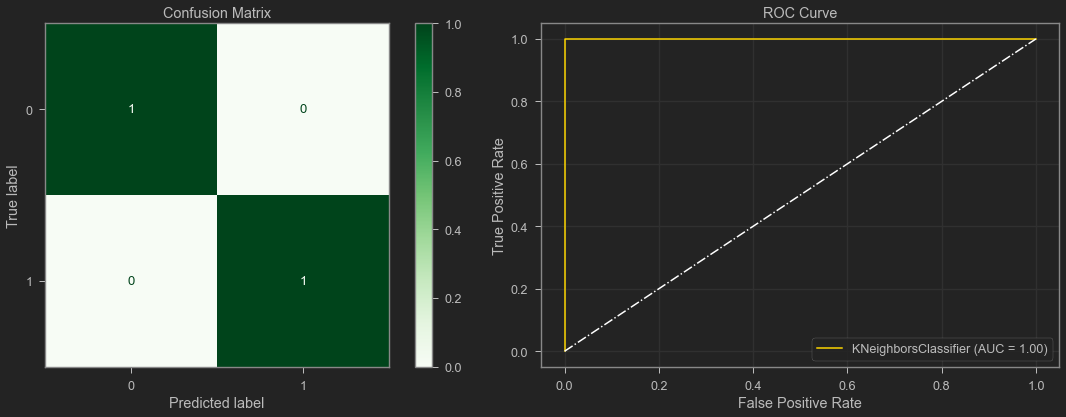

In [142]:
fun.model_report(knn_gs_best, X_train_knn, y_train, X_test_knn,
             y_test)

In [164]:
knn.__class__

sklearn.neighbors._classification.KNeighborsClassifier

# INTERPRET

In [165]:
# init shap
# shap.initjs()

## knn

In [166]:
# exp = shap.KernelExplainer(knn_gs_best.predict_proba,shap.sample(X_train_knn))
# shapval=exp.shap_values(X_test_knn)

In [174]:
shapval = joblib.load('shapval_knn_best.joblib')

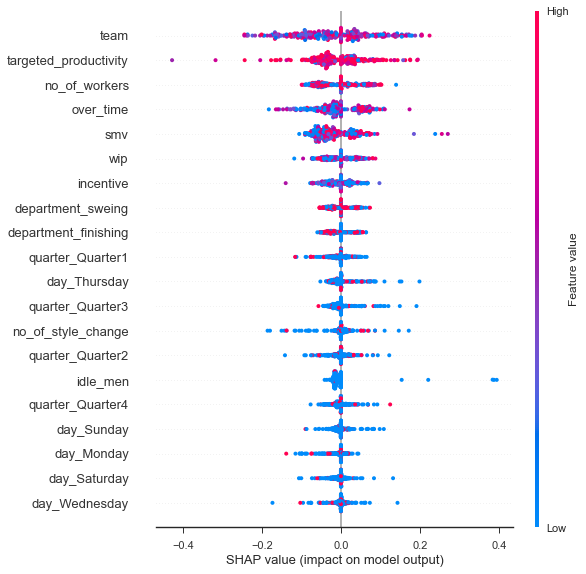

In [175]:
with plt.style.context('seaborn-deep'):
    shap.summary_plot(shapval[0],X_test_knn)

In [172]:
shapval.data.shape

(300, 23)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


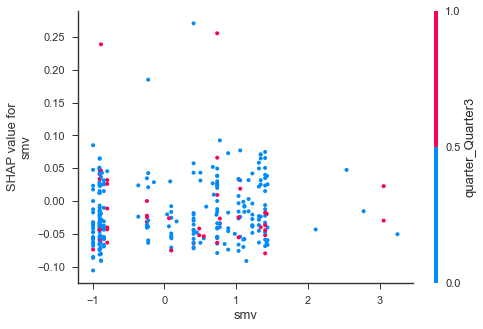

In [180]:
shap.dependence_plot('smv',shapval[0],X_test_knn)

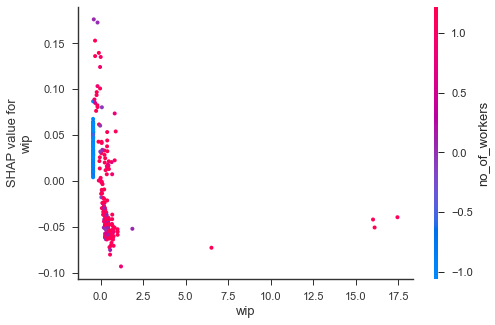

In [173]:
shap.dependence_plot("wip", shap_values[0], X_test_ensbl)

## rf

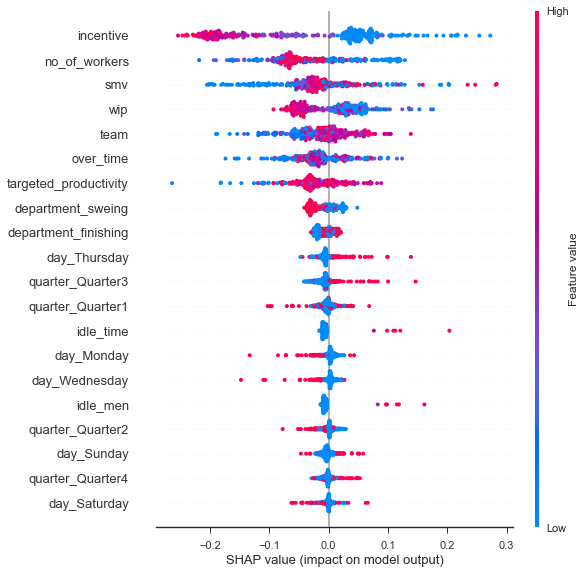

In [84]:
# explain all the predictions in the test set
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test_ensbl)
with plt.style.context('seaborn-deep'):
    shap.summary_plot(shap_values[0], X_test_ensbl)

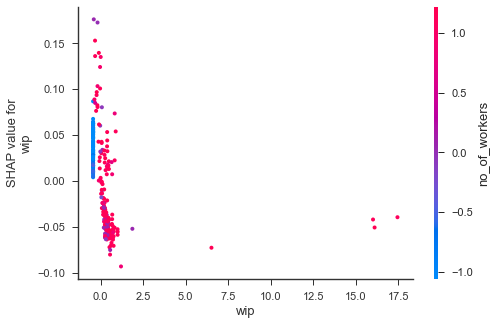

In [147]:
shap.dependence_plot("wip", shap_values[0], X_test_ensbl)

In [119]:
with plt.style.context('seaborn-deep'):
    b1 = shap.force_plot(explainer.expected_value[0], shap_values[0],show=False,)
    display((b1))
#     print(b1.style.keys())
#     display(HTML(b1))

In [198]:
eli5.show_weights(rf_clf, feature_names=list(X_test_ensbl.columns),)

Weight,Feature
0.1512 ± 0.1414,incentive
0.1412 ± 0.0775,smv
0.1072 ± 0.0835,no_of_workers
0.1033 ± 0.0475,over_time
0.0986 ± 0.0490,team
0.0953 ± 0.0450,targeted_productivity
0.0666 ± 0.0794,wip
0.0205 ± 0.0638,department_finishing
0.0177 ± 0.0144,quarter_Quarter1
0.0172 ± 0.0136,quarter_Quarter3


In [193]:
eli5.explain_weights(rf_clf, feature_names=list(X_test_ensbl.columns))

Weight,Feature
0.1512 ± 0.1414,incentive
0.1412 ± 0.0775,smv
0.1072 ± 0.0835,no_of_workers
0.1033 ± 0.0475,over_time
0.0986 ± 0.0490,team
0.0953 ± 0.0450,targeted_productivity
0.0666 ± 0.0794,wip
0.0205 ± 0.0638,department_finishing
0.0177 ± 0.0144,quarter_Quarter1
0.0172 ± 0.0136,quarter_Quarter3


In [186]:
eli5.explain_prediction(rf_clf, X_test_ensbl.iloc[10], feature_names=list(X_test_ensbl.columns))

Explanation(estimator='RandomForestClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.5027314285714283, std=None, value=1.0), FeatureWeight(feature='incentive', weight=0.16590341499453007, std=None, value=0.359660188968797), FeatureWeight(feature='team', weight=0.06564314171701133, std=None, value=-1.6963193060867183), FeatureWeight(feature='wip', weight=0.059496531552227186, std=None, value=0.7452347336271131), FeatureWeight(feature='targeted_productivity', weight=0.04002294576520803, std=None, value=0.7691385954367846), FeatureWeight(feature='smv', weight=0.036236969291311566, std=None, value=0.7348230127726303), FeatureWeight(feature='no_of_workers', weight=0.028324232444121706, std=None, value=1.1500759422392925), FeatureWeight(feature='department_finishing', weight=0.028280650982812287, std=None, value=0.0), FeatureWeight(feature='department_sweing', weight=0.026196556853489674, std=None, value=1.0), FeatureWeight(feature='over_time', weight=0.010411215184290881, std=None, value=0.8096479367835858), FeatureWeight(feature='idle_time', weight=0.007967854103648156, std=None, value=-0.06577156331096509), FeatureWeight(feature='idle_men', weight=0.007520208362405878, std=None, value=-0.16799820242885097), FeatureWeight(feature='day_Sunday', weight=0.007023511204717193, std=None, value=0.0), FeatureWeight(feature='day_Wednesday', weight=0.005401635625723144, std=None, value=1.0), FeatureWeight(feature='no_of_style_change', weight=0.0038470911853574377, std=None, value=-0.3332463510936255), FeatureWeight(feature='day_Thursday', weight=0.003244385033277034, std=None, value=0.0), FeatureWeight(feature='quarter_Quarter3', weight=0.0029665842495585192, std=None, value=0.0), FeatureWeight(feature='quarter_Quarter2', weight=0.0014757068520298978, std=None, value=0.0), FeatureWeight(feature='quarter_Quarter4', weight=0.0004115413905011578, std=None, value=0.0)], neg=[FeatureWeight(feature='day_Monday', weight=-0.001260290532709999, std=None, value=0.0), FeatureWeight(feature='day_Saturday', weight=-0.0006145785328944398, std=None, value=0.0), FeatureWeight(feature='quarter_Quarter5', weight=-0.0005590420483345815, std=None, value=0.0), FeatureWeight(feature='day_Tuesday', weight=-0.00041526236863037135, std=None, value=0.0), FeatureWeight(feature='quarter_Quarter1', weight=-0.0002564318810804045, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [196]:
eli5.explain_prediction_sklearn(rf_clf, X_test_ensbl.iloc[100], feature_names=list(X_test_ensbl.columns))

Explanation(estimator='RandomForestClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.5027314285714283, std=None, value=1.0), FeatureWeight(feature='no_of_workers', weight=0.22465496698032353, std=None, value=-0.5673711034493485), FeatureWeight(feature='smv', weight=0.1378558168319008, std=None, value=-0.9016741755871419), FeatureWeight(feature='over_time', weight=0.04481845903197566, std=None, value=-0.2387069692248712), FeatureWeight(feature='quarter_Quarter3', weight=0.04155561777587031, std=None, value=0.0), FeatureWeight(feature='quarter_Quarter4', weight=0.0303230588952784, std=None, value=1.0), FeatureWeight(feature='day_Thursday', weight=0.024534178949271707, std=None, value=0.0), FeatureWeight(feature='day_Saturday', weight=0.008599521937721927, std=None, value=0.0), FeatureWeight(feature='idle_time', weight=0.003518673547412157, std=None, value=-0.06577156331096509), FeatureWeight(feature='quarter_Quarter1', weight=0.0030617472728472045, std=None, value=0.0), FeatureWeight(feature='day_Tuesday', weight=0.00240428008176437, std=None, value=0.0), FeatureWeight(feature='idle_men', weight=0.0022634244776171294, std=None, value=-0.16799820242885097), FeatureWeight(feature='no_of_style_change', weight=0.0003934261737138234, std=None, value=-0.3332463510936255)], neg=[FeatureWeight(feature='incentive', weight=-0.06359088809351868, std=None, value=-0.2217338834927557), FeatureWeight(feature='department_finishing', weight=-0.022093418383448693, std=None, value=1.0), FeatureWeight(feature='department_sweing', weight=-0.016869484311298675, std=None, value=0.0), FeatureWeight(feature='quarter_Quarter2', weight=-0.010753005948102457, std=None, value=0.0), FeatureWeight(feature='wip', weight=-0.009056812260582473, std=None, value=-0.4395140529579333), FeatureWeight(feature='targeted_productivity', weight=-0.007426349852532143, std=None, value=0.20677376430818117), FeatureWeight(feature='day_Wednesday', weight=-0.00521102521266836, std=None, value=0.0), FeatureWeight(feature='quarter_Quarter5', weight=-0.004996311460260455, std=None, value=0.0), FeatureWeight(feature='team', weight=-0.003561356557567054, std=None, value=1.0207588054627388), FeatureWeight(feature='day_Sunday', weight=-0.0021030277566054445, std=None, value=1.0), FeatureWeight(feature='day_Monday', weight=-0.0010529206905411797, std=None, value=0.0)], pos_remaining=0, neg_remaining=0), proba=0.88, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## log reg

In [224]:
exp = shap.Explainer(logreg,X_train_log_reg,feature_names=X_train_log_reg.columns)
shapval=exp(X_test_log_reg) 
# explaining 1
shap.summary_plot(shapval,X_test_log_reg)

## saving model

In [3]:
import joblib 

In [107]:
joblib.dump(knn_gs_best,'knn_gs_best_precision_1.joblib')

['knn_gs_best_precision_1.joblib']

In [108]:
lod_mod = joblib.load('knn_gs_best_precision_1.joblib')

In [59]:
fun.save_model(dummy_classifier,custom_prefix='ta')

File saved: ta_DummyClassifier_5_21_2021_1_48_35.joblib


# RECOMMENDATION

# NEXT STEPS

# APPENDIX

## all functions from the `functions.py` and `packages.py`

In [6]:
fun.show_py_file_content('./imports_and_functions/functions.py')

```python
def example_pac(strr='Hellow World!!'):
    print(strr)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, QuantileTransformer, PowerTransformer, MaxAbsScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from IPython.display import display, HTML, Markdown
from sklearn import metrics
# Future plan: restructure functions to behave as class using OOP#

def check_NaN(df):
    """
    Checks for NaN in the pandas DataFrame and spits a DataFrame of report.
    Uses df.isnull() method.
    
    Parameters:
    ===========
    df = pandas.DataFrame

    ---version 0.9---
    """
    null_checking = []
    for column in df.columns:
        not_null = df[column].isnull().value_counts()[0]
        try:
            is_null = df[column].isnull().value_counts()[1]
        except:
            is_null = 0
        temp_dict = {'name': column, 'is_null': is_null, 'not_null': not_null}
        null_checking.append(temp_dict)
    df_ = pd.DataFrame(null_checking)
    return df_


def check_duplicates(df, verbose=False, limit_output=True, limit_num=150):
    """
    Checks for duplicates in the pandas DataFrame and return a Dataframe of report.
    
    Parameters:
    ===========
    df = pandas.DataFrame
    verbose = `int` or `boolean`; default: `False`
                `True` returns DataFrame with details of features.
                `False` returns DataFrame without details of features.
    limit_output = `int` or `boolean`; default: `True`
                `True` limits featurs display to 150.
                `False` details of unique features.
    limit_num = `int`, limit number of uniques; default: 150,

    ---version 1.2---
    """
    dup_checking = []
    for column in df.columns:
        not_duplicated = df[column].duplicated().value_counts()[0]
        try:
            duplicated = df[column].duplicated().value_counts()[1]
        except:
            duplicated = 0
        temp_dict = {
            'name': column,
            'duplicated': duplicated,
            'not_duplicated': not_duplicated
        }
        dup_checking.append(temp_dict)
    df_ = pd.DataFrame(dup_checking)

    if verbose:
        if limit_output:
            for col in df:
                if (len(df[col].unique()))<=limit_num:
                    print(f"{col} >> number of uniques: {len(df[col].unique())}\n{df[col].unique()}")
                else:
                    print(f"{col} >> number of uniques: {len(df[col].unique())}, showing top {limit_num} values\n{df[col].unique()[:limit_num]}")
                print(f"{'_'*60}")
        else:
            for col in df:
                print(f"{col} >> number of uniques: {len(df[col].unique())}\n{df[col].unique()}")
    return df_


def num_col_for_plotting(row, col=3):
    """
    +++ formatting helper function +++
    __________________________________
    Returns number of rows to plot
    
    Parameters:
    ===========
    row = int;
    col = int; default col: 3
    """
    if row % col != 0:
        return (row // col) + 1
    else:
        return row // col


def distribution_of_features(df, n_cols=3, fig_size=(16, 26), color_plot='gold', kde_show=True, label_rotation=45,set_loglevel='warning'):
    """
    Parameters:
    ===========
    df          = pandas.DataFrame,
    n_cols      = int; default: 3,
                    controls number of columns per row of the figure.
    fig_size    = tuple (length, height); default: (16, 26),
                    controls the figure size of the output. 
    color_plot  = str; default: 'gold',
                    controls color of the histplot and kde plot.
    kde_show    = `int` or `boolean`; default: `True`,
                    `True` shows kde plot.
                    `False` does not show kde plot.
    label_rotation = int; default: 45,
                    sets x label rotation.
    set_loglevel = str; default: 'warning',
                    The log level of the handler.
                    "notset", "debug", "info", "warning", "error", "critical"
                    
    
    ---version 1.2---
    """
    plt.set_loglevel(set_loglevel)
    fig, axes = plt.subplots(nrows=num_col_for_plotting(len(df.columns),
                                                        col=n_cols),
                             ncols=n_cols,
                             figsize=fig_size,
                             sharey=False)
    for ax, column in zip(axes.flatten(), df):
        sns.histplot(x=column, data=df, color=color_plot, ax=ax, kde=kde_show)
        ax.set_title(f'Histplot of {column.title()}')
        ax.tick_params('x', labelrotation=label_rotation)
        sns.despine()
        plt.tight_layout()
        plt.suptitle('Histogram plots of the dataset',
                     fontsize=20,
                     fontweight=3,
                     va='bottom')
    plt.show()
        


def dataset_preprocessing_pipeline(X_train, X_test, scaler=StandardScaler(), drop=None):
    """
    Takes X_train, and X_test DataFrames. Then seperates DataFrame by categorical and numerical coulmns, and performs OneHotEncoding with droping control on categorical coulumns and scaling on numerical columns, user can select scalers. 
    Returns transformed DataFrames.
    
    All transforming steps are done using scikit-learn preprocessing, pipeline, and compose objects; and DataFrame creation is done with pandas. 
    
    Parameters:
    ===========
    X_train = pandas.DataFrame object; no default,
                training split of the DataFrame.
    X_test  = pandas.DataFrame object; no default,
                testing split of the DataFrame.
    scaler  = `sklarn scaler object` or `None`; default: StandardScaler(),
                *** IMPORT desired scaler before using. ***
                *** OR call with this module. all of them are imported and ready 
                to use inside this module.***
                Available options:
                - StandardScaler: removes the mean and scales the data to 
                    unit variance. 
                - MinMaxScaler: rescales the data set such that all feature 
                    values are in the range [0, 1]
                - RobustScaler: is based on percentiles and are therefore not
                    influenced by a few number of very large marginal outliers.
                - QuantileTransformer: applies a non-linear transformation 
                    such that the probability density function of each feature
                    will be mapped to a uniform or Gaussian distribution.
                - PowerTransformer: applies a power transformation to each 
                    feature to make the data more Gaussian-like in order to 
                    stabilize variance and minimize skewness.
                - MaxAbsScaler: is similar to `MinMaxScaler` except that the
                    values are mapped in the range [0, 1]
                - Normalizer: rescales the vector for each sample to have 
                    unit norm, independently of the distribution of the samples.
                - None: does not scale data.
    drop    = str or `None`; default: None.
                Option to control OneHotEncoder droping.
                - None : retain all features (the default).
                - 'first' : drop the first category in each feature. If only one
                  category is present, the feature will be dropped entirely.
                - 'if_binary' : drop the first category in each feature with two
                  categories. Features with 1 or more than 2 categories are
                  left intact.
                - array : ``drop[i]`` is the category in feature ``X[:, i]`` that
                  should be dropped.
    NOTE: 
        - possible error if test data has unseen category; creating new 
          DataFrame will fail.
        - Source can be modified to add more preprocessing steps.
    
    Next steps: use OOP to make this a class.

    ---version 0.9.9---
    """
    # isolating numerical features
    nume_cols = X_train.select_dtypes('number').columns.to_list()
    # isolating categorical features
    cate_cols = X_train.select_dtypes('category').columns.to_list()
    # pipeline for processing categorical features
    pipe_cate = Pipeline([('ohe', OneHotEncoder(sparse=False, drop=drop))])
    # pipeline for processing numerical features
    pipe_nume = Pipeline([('scaler', scaler)])
    # Coulmn transformer
    preprocessor = ColumnTransformer([
        ('numerical_features', pipe_nume, nume_cols),
        ('categorical_features', pipe_cate, cate_cols)
    ])
    
    # creating a pandas.DataFrame with appropriate header
    # creating modified X_train
    ret_X_train = pd.DataFrame(
        preprocessor.fit_transform(X_train),
        columns=nume_cols +
        preprocessor.named_transformers_['categorical_features'].
        named_steps['ohe'].get_feature_names(cate_cols).tolist())
    
    # creating modified X_test
    # NOTE: possible error if test data has unseen category, in this step.
    # for debugging such error modify this and its processing.
    ret_X_test = pd.DataFrame(
        preprocessor.transform(X_test),
        columns=nume_cols +
        preprocessor.named_transformers_['categorical_features'].
        named_steps['ohe'].get_feature_names(cate_cols).tolist())
    return ret_X_train, ret_X_test

# def df_preprocessing_pipeline(df, scaler=StandardScaler(), drop=None):
#     """ **Error in judgment**
#     Seperates DataFrame by categorical and numerical coulmns, and performs OneHotEncoding with droping control on categorical coulumns and scaling on numerical columns, user can select scalers. Then returns a transformed DataFrame.
#     All steps are done using sklearn pipelines and transformers. 
    
#     Parameters:
#     ===========
#     df     = pandas.DataFrame object.
#     scaler = sklarn scaler object; default: StandardScaler(),
#                 *** IMPORT desired scaler before using. ***
#                 *** OR call with this module. all of them are imported and ready 
#                 to use inside this module.***
#                 Available options:
#                 - StandardScaler: removes the mean and scales the data to 
#                     unit variance. 
#                 - MinMaxScaler: rescales the data set such that all feature 
#                     values are in the range [0, 1]
#                 - RobustScaler: is based on percentiles and are therefore not
#                     influenced by a few number of very large marginal outliers.
#                 - QuantileTransformer: applies a non-linear transformation 
#                     such that the probability density function of each feature
#                     will be mapped to a uniform or Gaussian distribution.
#                 - PowerTransformer: applies a power transformation to each 
#                     feature to make the data more Gaussian-like in order to 
#                     stabilize variance and minimize skewness.
#                 - MaxAbsScaler: is similar to `MinMaxScaler` except that the
#                     values are mapped in the range [0, 1]
#                 - Normalizer: rescales the vector for each sample to have 
#                     unit norm, independently of the distribution of the samples.
#     drop   = str or `None`, Option to control OHE droping; default: None.
#                 - None : retain all features (the default).
#                 - 'first' : drop the first category in each feature. If only one
#                   category is present, the feature will be dropped entirely.
#                 - 'if_binary' : drop the first category in each feature with two
#                   categories. Features with 1 or more than 2 categories are
#                   left intact.
#                 - array : ``drop[i]`` is the category in feature ``X[:, i]`` that
#                   should be dropped.
    
#     Next steps: use OOP to make this a class.

#     ---version 0.9.1---
#     """
#     # isolating numerical features
#     nume_cols = df.select_dtypes('number').columns.to_list()
#     # isolating categorical features
#     cate_cols = df.select_dtypes('category').columns.to_list()
#     # pipeline for processing categorical features
#     pipe_cate = Pipeline([('ohe', OneHotEncoder(sparse=False, drop=drop))])
#     # pipeline for processing numerical features
#     pipe_nume = Pipeline([('scaler', scaler)])
#     # Coulmn transformer
#     preprocessor = ColumnTransformer([
#         ('numerical_features', pipe_nume, nume_cols),
#         ('categorical_features', pipe_cate, cate_cols)
#     ])
#     # creating a pandas.DataFrame with appropriate header
#     ret = pd.DataFrame(
#         preprocessor.fit_transform(df),
#         columns=nume_cols +
#         preprocessor.named_transformers_['categorical_features'].
#         named_steps['ohe'].get_feature_names(cate_cols).tolist())
#     return ret

def coefficients_of_model_binary(model,X_train_data, log_scale=True):
    """
    Returns a pandas.Series object with intercept and coeffients of a logistic regression model with features as index
    
    Parameters:
    ===========
    model        = object; No Default. 
                    fitted sklearn model object with a coef_ and intercept_ attribute.
    X_train_data = pandas.DataFrame; No Default.
                    DataFrame of independant variables. Should be train-test splitted. 
                    Use train data.  
    log_scale    = boolean; default: True.
                    `True` for keeping log scale of coefficients.
                    `False` for converting to normal scale.

    """
    coeffs = pd.Series(model.coef_.flatten(), index=X_train_data.columns)
    coeffs['intercept'] = model.intercept_[0]
    if log_scale is False:
        coeffs = np.exp(coeffs)
    return coeffs

def coefficients_of_model(model,X_train_data,log_scale=True):
    """
    Returns a pandas.Series object with intercept and coeffients.
    Parameters:
    ===========
    model        = object; No Default. 
                    fitted sklearn model object with a coef_ and intercept_ attribute.
    X_train_data = pandas.DataFrame; No Default.
                    DataFrame of independant variables. Should be train-test splitted. 
                    Use train data.  
    log_scale    = boolean; default: True.
                    `True` for keeping log scale of coefficients.
                    `False` for converting to normal scale.

    """
    coeffs = pd.Series(model.coef_.flatten())
    coeffs['intercept'] = model.intercept_[0]
    if log_scale is False:
        coeffs = np.exp(coeffs)
    return coeffs

def model_report(model,
                 X_train,
                 y_train,
                 X_test,
                 y_test,
                 cmap='Greens',
                 normalize='true',
                 figsize=(16, 6)):
    """
    Report of model using train-test split dataset.
    Shows train and test score, Confusion Matrix of test data and, ROC Curve of test data.
    
    Parameters:
    ===========
    model     = object, scikit-learn model object; no default.
    X_train   = pandas.DataFrame, predictor variable training data split; no default,
    y_train   = pandas.DataFrame, target variable training data split; no default,
    X_test    = pandas.DataFrame, predictor variable test data split; no default,
    y_test    = pandas.DataFrame, target variable test data split; no default,
    cmap      = str, colormap of Confusion Matrix; default: 'Greens',
    normalize = str, normalize count of Confusion Matrix; default: 'true',
                `true` to normalize counts.
                `false` to show raw scounts.
    figsize   = tuple ``(lenght, height)``, figsize of output; default: (16, 6),
    
    ---version 0.9.9---
    """
    
    def str_model_(model):
        """Helper function to get model class display statement, this text conversion breaks code if performed in ``model_report`` function's local space. This function is to isolate from the previous function's local space."""
        str_model = str(model.__class__).split('.')[-1][:-2]
        display(
            HTML(
                f"""<strong>Report of {str_model} type model using train-test split dataset.</strong>"""
            ))

    str_model_(model)
    model.fit(X_train, y_train)
    print(f"{'*'*90}")
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    print(f"""Train accuracy score: {train.round(4)}""")
    print(f"""Test accuracy score: {test.round(4)}""")
    if abs(train - test) <= .05:
        print(
            f"    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold."
        )
    elif (train - test) > .05:
        print(
            f"    Possible Overfitting, diffrence of scores {round(abs(train-test)*100,2)}% crossed 5% thresh hold."
        )
    elif (train - test) < -.05:
        print(
            f"    Possible Underfitting, diffrence of scores {round(abs(train-test)*100,2)}% crossed 5% thresh hold."
        )
    print(f"{'*'*90}")
    print("")
    print(f"{'*'*60}")
    print(f"""Classification report of:
    {model}""")
    print(f"{'-'*60}")
    print(metrics.classification_report(y_test, model.predict(X_test)))
    print(f"{'*'*60}")

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    metrics.plot_confusion_matrix(model,
                                  X_test,
                                  y_test,
                                  cmap=cmap,
                                  normalize=normalize,
                                  ax=ax[0])
    ax[0].title.set_text('Confusion Matrix')
    metrics.plot_roc_curve(model,
                           X_test,
                           y_test,
                           color='gold',
                           ax=ax[1])
    ax[1].plot([0, 1], [0, 1], ls='-.', color='white')
    ax[1].grid()
    ax[1].title.set_text('ROC Curve')

    plt.tight_layout()
    plt.show()

def heatmap_of_features(df, annot_format='.1f'):
    """
    Return a masked heatmap of the given DataFrame
    
    Parameters:
    ===========
    df            = pandas.DataFrame object.
    annot_format  = str, for formatting; default: '.1f'
    
    Example of `annot_format`:
    --------------------------
    .1e = scientific notation with 1 decimal point (standard form)
    .2f = 2 decimal places
    .3g = 3 significant figures
    .4% = percentage with 4 decimal places
    
    Note:
    =====
    Rounding error can happen if '.1f' is used.
    
    -- version: 1.1 --
    """
    with plt.style.context('dark_background'):
        plt.figure(figsize=(10, 10), facecolor='k')
        mask = np.triu(np.ones_like(df.corr(), dtype=bool))
        cmap = sns.diverging_palette(3, 3, as_cmap=True)
        ax = sns.heatmap(df.corr(),
                    mask=mask,
                    cmap=cmap,
                    annot=True,
                    fmt=annot_format,
                    linecolor='k',
                    annot_kws={"size": 9},
                    square=True,
                    linewidths=.5,
                    cbar_kws={"shrink": .5})
        plt.title(f'Features heatmap', fontdict={"size": 20})
        plt.show()
        return ax
    
def top_correlated_features(df, limit=.75, verbose=False):
    """
    Input a Pandas DataFrame to get top correlated (based on absolute value) features filtered by a cutoff.
    
    Parameters:
    ===========
    df        = pandas.DataFrame object.
    limit     = float; default: .75
    verbose   = boolean; default: False. 
                `True` returns DataFrame without filtering by cutoff.
                `False` returns DataFrame filted by cutoff.
    """
    df_corr = df.corr().abs().unstack().reset_index().sort_values(
        0, ascending=False)
    df_corr.columns = ["feature_0", 'feature_1', 'correlation']
    df_corr['keep_me'] = df_corr.apply(
        lambda x: False if x['feature_0'] == x['feature_1'] else True, axis=1)
    df_corr['feature_combo'] = df_corr.apply(
        lambda x: ' and '.join(set(x[['feature_0', 'feature_1']])), axis=1)

    corr_features = df_corr[df_corr.keep_me == True][[
        'feature_combo', 'correlation'
    ]].drop_duplicates().reset_index(drop='index')
    # features with correlation more than 75%
    if verbose == True:
        return corr_features
    else:
        return corr_features[corr_features.correlation > limit]

def drop_features_based_on_correlation(df, threshold=0.75):
    """
    Returns features with high collinearity.
    
    Parameters:
    ===========
    df = pandas.DataFrame; no default.
            data to work on.
    threshold = float; default: .75.
            Cut off value of check of collinearity.
    -- ver: 1.0 --
    """
    feature_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]
                   ) > threshold:  # absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                feature_corr.add(colname)
    return feature_corr

def show_py_file_content(file='functions.py'):
    """
    displays content of a py file output formatted as python code in jupyter notebook.
    
    Parameter:
    ==========
    file = `str`; default: 'functions.py',
                path to the py file.
    """
    with open(file, 'r') as f:
        x = f"""```python
{f.read()}
```"""
        display(Markdown(x))
```

In [7]:
fun.show_py_file_content('./imports_and_functions/packages.py')

```python
# core operational packeges
import os
import warnings

# dataset manupulation
import pandas as pd
pd.set_option('display.max_columns', 0)
import numpy as np
from IPython.display import display, HTML, Markdown

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.graph_objs as go
# import plotly.express as px

# Machine Learning
# preprocessing
from sklearn import set_config
from sklearn.model_selection import train_test_split#, cross_val_predict, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
# from imblearn.over_sampling import SMOTE,SMOTENC


# model
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier, XGBRFClassifier
import xgboost as xgb

from catboost import CatBoostClassifier

# Model Explainers
# from yellowbrick.classifier.rocauc import roc_auc, precision_recall_curve, confusion_matrix, classification_report, ClassPredictionError

import shap
import lime
import interpret
import eli5

from time import sleep

```